# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)


# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    plot_confusion_matrix,
    make_scorer,
)    

In [2]:
booking=pd.read_csv("INNHotelsGroup.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
def checkthedata(df):
    """ Give key values of the data frame df """
    # display 2 rows from the beginning and the end of the dataframe and 10 randomly picked ones from inbetween
    display(df.head(2))
    display(df.tail(2))
    np.random.seed(1)
    display(df.sample(n=10))

    # print key information about the dataframe
    
    print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.\n") # shape
    display(df.info()) # columns & datatypes
    print('\033[1m' + "\nDescribe Data:"+ '\033[0m')
    df_num=df.select_dtypes('number')
    df_cat=df.drop(df_num.columns,axis=1)
    print('\033[1m' + "\nNumerical Variables:"+ '\033[0m')    
    display(df_num.describe(include="all").T) # describe number values
    print('\033[1m' + "\nNon Numerical Variables:"+ '\033[0m')    
    display(df_cat.describe(include="all").T) # describe non-number values
    print('\033[1m' + "\nMissing Values:"+ '\033[0m')    
    print(df.isnull().sum()) # missing values
    print('\033[1m' + "\nDuplicates:"+ '\033[0m')  
    print(df.duplicated().sum()) # Duplicates


In [4]:
checkthedata(booking)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
30392   INN30393             1               0                     1   
6685    INN06686             2               0                     1   
8369    INN08370             2               0                     2   
2055    INN02056             2               0                     0   
10969   INN10970             1               0                     2   
24881   INN24882             2               0                     3   
28658   INN28659             2               0                     0   
20853   INN20854             2               0                     1   
8501    INN08502             2               0                     0   
1942    INN01943             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
30392                  0      Not Selected                           0   
6685                   2       Meal Plan 1                           0   
8369                   3       Meal Plan 1                           0   
2055                   2      Not Selected                           0   
10969                  4       Meal Plan 1                           0   
24881                  7       Meal Plan 1                           0   
28658                  3       Meal Plan 2                           0   
20853                  2       Meal Plan 1                           0   
8501                   3       Meal Plan 1                           0   
1942                   2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
30392        Room_Type 1         53          2018              9   
6685         Room_Type 1         63          2018              4   
8369         Room_Type 4         55          2018              9   
2055         Room_Type 1         53          2017             12   
10969        Room_Type 1        245          2018              7   
24881        Room_Type 2        231          2018              8   
28658        Room_Type 1         71          2018              5   
20853        Room_Type 1         66          2017             10   
8501         Room_Type 2         40          2018              1   
1942         Room_Type 1         63          2018              8   

       arrival_date market_segment_type  repeated_guest  \
30392            11              Online               0   
6685             22              Online               0   
8369             11              Online               0   
2055             29              Online               0   
10969             6             Offline               0   
24881             1              Online               0   
28658            10             Offline               0   
20853             9             Offline               0   
8501             14              Online               0   
1942              9              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
30392                             0                                     0   
6685                              0                                     0   
8369                              0                                     0   
2055                              0                                     0   
10969                             0                                     0   
24881                             0                                     0   
28658                             0                                     0   
20853                             0                                     0   
8501                              0                                     0   
1942                              0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
30392               94.32                       0   Not_Canceled  
6685             

There are 36275 rows and 19 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 

None


Describe Data:

Numerical Variables:


count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0


Non Numerical Variables:


count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390


Missing Values:
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Duplicates:
0


#### Observation
- We have a data set of 36275 rows and 19 columns
- Our dependent variable is booking_status which is an object type variable
- Booking ID, type_of_meal_plan, room_type_reserved and market_segment_type are also object type, average_price_per_room is float type, everything else are integers.
- There are no missing values and no duplicates.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [5]:
""" a block of user defined functions to look at individual variables from a dataframe: 
    - box_hist: plot boxplot and histogram next to each other
    - find_outliers: checks for outliners that are more than x-times IQR away from the data mean
    - check_number_variable: analyzes at a numerical variable
    - labeled_barplot: plots a barplot
    - check_out_object: analyzes a non-numerical variable
"""

def box_hist(name,df,binsplot=20,Headline="",plotrow=1,allrows=1):
    
    """    
    plotting a boxplot and a histogram next to each other
    name = name of variable in df
    df=dataframe
    binsplot=number of bins in histograms
    Headline=title of plot
    allrows = all rows in figure if several columns need to be plotted below each other
    plot size needs to be defined before running this function so it can be run in loops
     """   


    if Headline=="":Headline=name # the title of the plot

    #left box plot
    plt.subplot(allrows,2,plotrow*2-1); 
    plt.xlabel(name);
    sns.boxplot(data = df, x =df[name], showmeans=True).set(xlabel=Headline);

    #right histogram 
    plt.subplot(allrows,2,plotrow*2); 
    plt.xlabel(Headline);
    #plt.ylabel("number of people who landed on page");
    plt.axvline(df[name].mean(), color='g', linewidth=2,label="Mean"); #green mean line
    plt.axvline(df[name].median(), color='b', linestyle='dashed', linewidth=2,label="Median"); #blue dashed median line
    plt.legend()
    sns.histplot(df[name],bins=binsplot,kde="kde");
    



def find_outliers(data,iqr_multiplier=4):
    
    """ checks for outliners that are more than iqr_multipliere*IQR away from the data mean """
    data=data.dropna() #drop missing values
    all=data.count() #number of elements
    q1 = np.percentile(data, 25) # 25 percentile mark of data
    q2 = np.percentile(data, 50) # 50 percentile mark = median of data    
    q3 = np.percentile(data, 75) # 75 percentile mark of data

    IQR = q3-q1 #Inter quartile range 
    lwr_bound = q2-iqr_multiplier*IQR #lower end for outliners
    upr_bound = q2+iqr_multiplier*IQR #upper end for outliners

    #j = np.array(all)
    upper_percent=sum(i > upr_bound for i in data)/all*100 #count data in upper outliner range in % of all data
    lower_percent=sum(i < lwr_bound for i in data)/all*100  #count data in lower outliner range in % of all data
    
    upperandlower=upper_percent+lower_percent # % all outliers

    return upper_percent,lower_percent,upperandlower,lwr_bound,upr_bound


def check_number_variable(df,name,bins=20):
    
    """ 
    analyzes at a numerical variable, print statistical values and plot a boxplot and a histogram
    """

    #find the correct row for our variable in df.describe().T
    
    j=name 
    t=0
    p=0
    for i in df.select_dtypes('number').columns:
        if i==j:
            p=1
        if p==0:
            t=t+1
    data_describe=df.describe().T
    
    # pick the row and put it into a new df
    show_me=data_describe[t:t+1].copy()
    
    # add number of unique values, number of missing values, skewness, and % outliners in 4IQR range

    show_me['unique values']=df[j].nunique()
    show_me['missing values']=df[j].isnull().sum()
    show_me['skewedness']=round(df[j].skew(),1)
    show_me['% outliers 2IQR']=round(find_outliers(df[j],iqr_multiplier=2)[2],2)
    show_me['% outliers 4IQR']=round(find_outliers(df[j])[2],2)
  
    #display statistical values
    display(show_me)
    
    #plot boxplot and histogram
    fig = plt.gcf()
    fig.set_size_inches(15,5)
    box_hist(name,df,binsplot=bins,Headline="")
    



def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with count or percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique() 
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    
def check_out_object(df,name):

    """ 
    look at a categorical/object variable, print statistical values and plot a barplot
    """

    # print barplot
    labeled_barplot(df, name, perc=True, n=None)
    
    # new df with top 5 and their percentage value
    df1=pd.DataFrame(round(df[name].value_counts(2)*100,1),df[name].value_counts().keys()[0:5])
    
    # new df with describe() of the column
    df2=pd.DataFrame(df[name].describe())

    #Transpose describe df
    df3=df2.T
    # add missing values
    df3['missing values']=df[name].isnull().sum()
    # combine dfs and rename column headers in df1 to add '%' 
    df3=df3.join(df1.T.rename(columns=lambda s: "%"+str(s)))

    display(df3)   

### Analyze the individual Variables

#### Number of Children & Adults

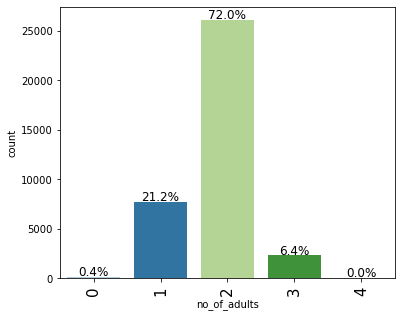

count      mean       std  min  25%  50%  75%  max  \
no_of_adults  36275.0  1.844962  0.518715  0.0  2.0  2.0  2.0  4.0   

              missing values    %2    %1   %3   %0   %4  
no_of_adults               0  72.0  21.2  6.4  0.4  0.0

In [6]:
check_out_object(booking,'no_of_adults')

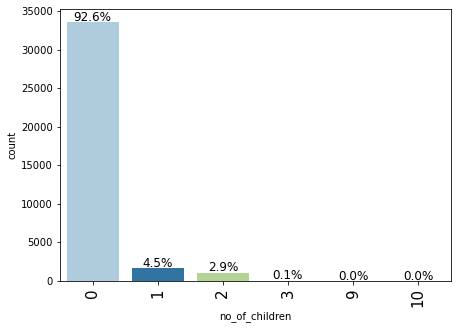

count      mean       std  min  25%  50%  75%   max  \
no_of_children  36275.0  0.105279  0.402648  0.0  0.0  0.0  0.0  10.0   

                missing values    %0   %1   %2   %3   %9  
no_of_children               0  92.6  4.5  2.9  0.1  0.0

In [7]:
check_out_object(booking,'no_of_children')

In [8]:
booking['no_of_children'].value_counts() #checking the actual numbers of children

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

In [9]:
booking[booking['no_of_adults']==0]['no_of_children'].value_counts() #how many reservations are without adults

2    133
3      5
1      1
Name: no_of_children, dtype: int64

In [10]:
booking_new=booking.copy() #creating a new data frame to manipulate the data and keep the original clean
# checking number of people in reservation
booking_new['allguests']=booking_new['no_of_adults']+booking_new['no_of_children']
booking_new['allguests'].value_counts()

2     23942
1      7552
3      3851
4       912
5        15
12        1
10        1
11        1
Name: allguests, dtype: int64

- There are reservations for 0-4 adults, 2 adults being the most with 72% followed by 1 with 21%. 
- 93% of reservations are without children, 4.4% with one child, 2.9% with two childrem and .5% with 3 children
- 3 bookings are with 9 or 10 children. Since they are nowhere near a relevant sample size and might have very different requirements with that many children, we will drop them later.

- Apart from those it looks like there are no reservations with more than 5 people. So the reservations with 0 adults might come from one reservation that is split in two with a seperate room for 'overflow' kids.

#### Duration of Stay

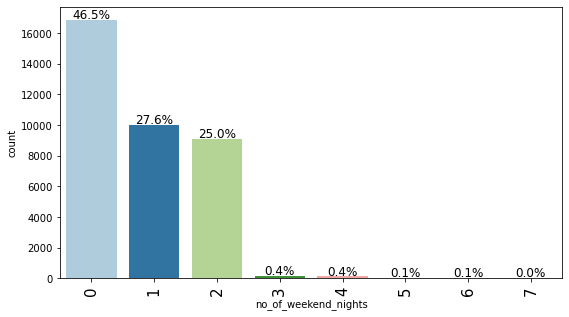

count      mean       std  min  25%  50%  75%  max  \
no_of_weekend_nights  36275.0  0.810724  0.870644  0.0  0.0  1.0  2.0  7.0   

                      missing values    %0    %1    %2   %3   %4  
no_of_weekend_nights               0  46.5  27.6  25.0  0.4  0.4

In [11]:
check_out_object(booking,'no_of_weekend_nights')

In [12]:
# making sure weekend days are only weekend days and not also holidays, eg. Easter Friday which is a national holiday in Portugal
booking_new['length_of_stay']=booking_new['no_of_weekend_nights']+booking_new['no_of_week_nights']

print("Number of reservations with less than 5 days but 3+ weekend days:",booking_new[(booking_new['length_of_stay']<8)&(booking_new['no_of_weekend_nights']>=3)].shape[0])

print("Number of reservations without an overnight stay:",booking_new[(booking_new['length_of_stay']==0)].shape[0])

Number of reservations with less than 5 days but 3+ weekend days: 0
Number of reservations without an overnight stay: 78


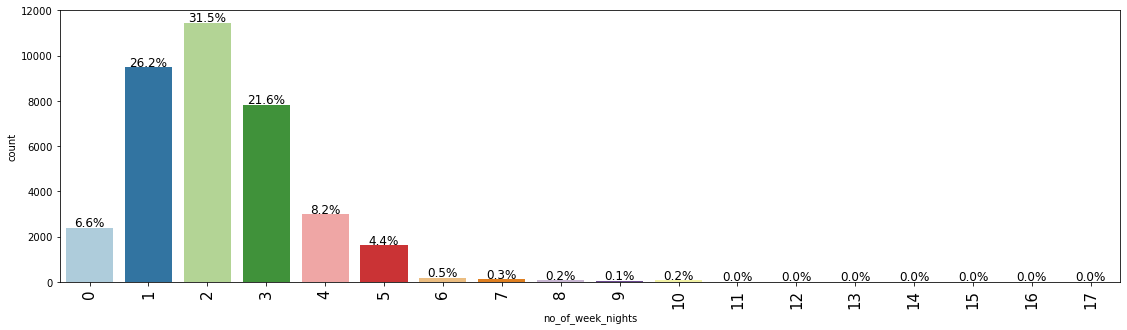

count    mean       std  min  25%  50%  75%   max  \
no_of_week_nights  36275.0  2.2043  1.410905  0.0  1.0  2.0  3.0  17.0   

                   missing values    %2    %1    %3   %4   %0  
no_of_week_nights               0  31.5  26.2  21.6  8.2  6.6

In [13]:
check_out_object(booking,'no_of_week_nights')

In [14]:
# is the stay weekend only, weekday only or mixed
def we_wd(we,wd):
    if we==0:
        return "weekday_only"
 
    elif wd==0:
        return "weekend_only"
    else:
        return "both"
booking_new['day_of_week']=booking_new.apply(lambda x: we_wd(x['no_of_weekend_nights'],x['no_of_week_nights']), axis = 1)

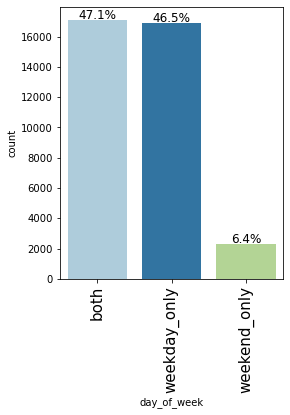

count unique   top   freq  missing values  %both  %weekday_only  \
day_of_week  36275      3  both  17094               0   47.1           46.5   

             %weekend_only  
day_of_week            6.4

In [15]:
check_out_object(booking_new,'day_of_week')

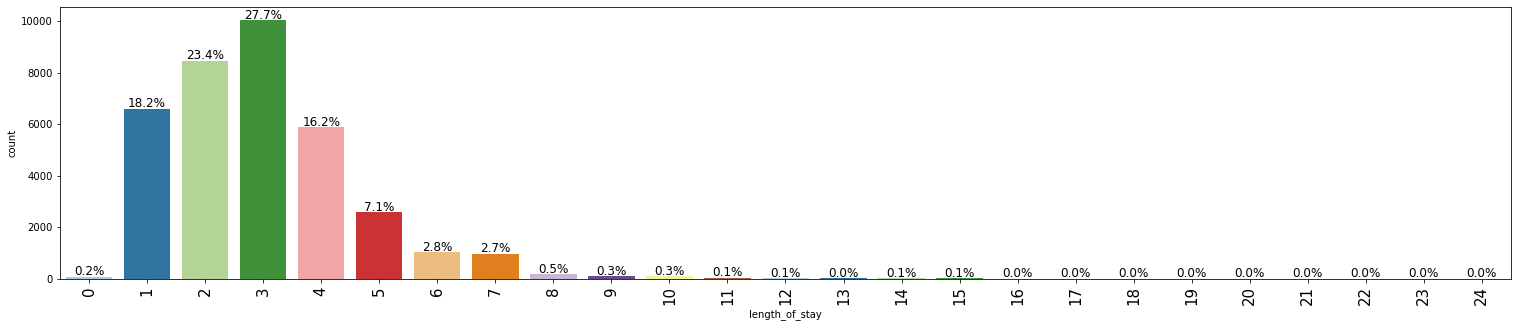

count      mean       std  min  25%  50%  75%   max  \
length_of_stay  36275.0  3.015024  1.786017  0.0  2.0  3.0  4.0  24.0   

                missing values    %3    %2    %1    %4   %5  
length_of_stay               0  27.7  23.4  18.2  16.2  7.1

In [16]:
check_out_object(booking_new,'length_of_stay')

- Only 6.4% only stayed for the weekend, the other reservations are about evenly split between stays only during the week and week and weekend mixed.
- Most reservations were made for 2 (31%) or 1 (26.2%) nights during the week.
- Lenght of stay varied between 1 and 24 days with an average of 3 days.
- 78 reservations didn't include an overnight stay. Those might have been dinner reservations that were added to a room reservation later. We will drop those.

#### Meal Plan

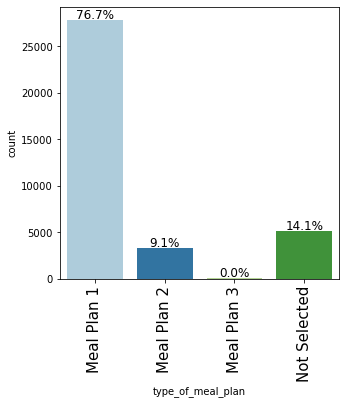

count unique          top   freq  missing values  \
type_of_meal_plan  36275      4  Meal Plan 1  27835               0   

                   %Meal Plan 1  %Not Selected  %Meal Plan 2  %Meal Plan 3  
type_of_meal_plan          76.7           14.1           9.1           0.0

In [17]:
check_out_object(booking,'type_of_meal_plan')

- There are 3 meal plans. The most popular one (77%) is the one with only breakfast, Half board was chosen by 9% of the reservations.
- 14% didn't select a meal plan.

#### Car Parking Space required

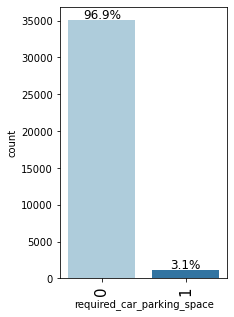

count      mean       std  min  25%  50%  75%  \
required_car_parking_space  36275.0  0.030986  0.173281  0.0  0.0  0.0  0.0   

                            max  missing values    %0   %1  
required_car_parking_space  1.0               0  96.9  3.1

In [18]:
check_out_object(booking,'required_car_parking_space')

Only 3% of the reservations request a car parking space. It isn't clear from the data dictionary what this means. Could be a disabled car parking spot or it might be that this is only needed for a few hotels eg in the big cities where parking is not readily available. Even though Portugal has great public transport, it is unlikely that so few people take a car to travel. 

#### Room Type

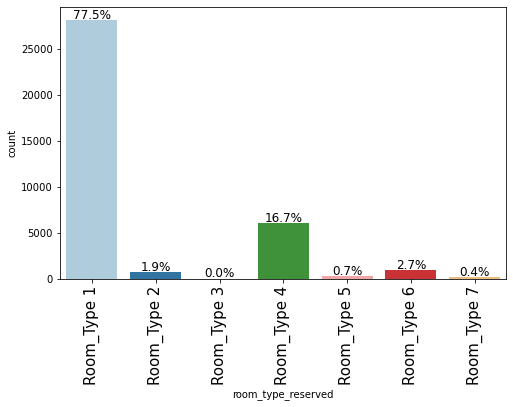

count unique          top   freq  missing values  \
room_type_reserved  36275      7  Room_Type 1  28130               0   

                    %Room_Type 1  %Room_Type 4  %Room_Type 6  %Room_Type 2  \
room_type_reserved          77.5          16.7           2.7           1.9   

                    %Room_Type 5  
room_type_reserved           0.7

In [19]:
check_out_object(booking,'room_type_reserved')

- Room type 1 was requested by 77% of the reservations, room type 4 by 17%. 
- There are 7 room types alltogether, but we don't have any information about them.

#### Lead Time

count       mean        std  min   25%   50%    75%    max  \
lead_time  36275.0  85.232557  85.930817  0.0  17.0  57.0  126.0  443.0   

           unique values  missing values  skewedness  % outliers 2IQR  \
lead_time            352               0         1.3             4.58   

           % outliers 4IQR  
lead_time              0.0

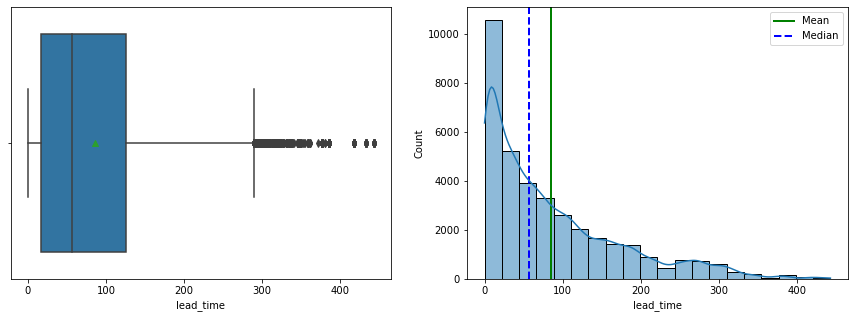

In [20]:
check_number_variable(booking,'lead_time')

- Lead Time ranged from 0-443 days with an avarage of 85 days.
- 50% of the reservations were made within the last 57 days.
- The data is right squewed and there are some outliers.


#### Date of Arrival

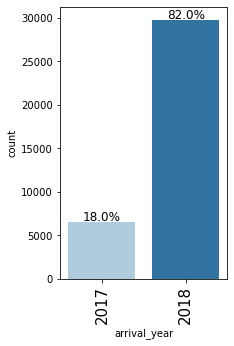

count         mean       std     min     25%     50%     75%  \
arrival_year  36275.0  2017.820427  0.383836  2017.0  2018.0  2018.0  2018.0   

                 max  missing values  %2018  %2017  
arrival_year  2018.0               0   82.0   18.0

In [21]:
check_out_object(booking,'arrival_year')

In [22]:
booking_new.groupby(['arrival_year',"arrival_month"])["booking_status"].count()

arrival_year  arrival_month
2017          7                 363
              8                1014
              9                1649
              10               1913
              11                647
              12                928
2018          1                1014
              2                1704
              3                2358
              4                2736
              5                2598
              6                3203
              7                2557
              8                2799
              9                2962
              10               3404
              11               2333
              12               2093
Name: booking_status, dtype: int64

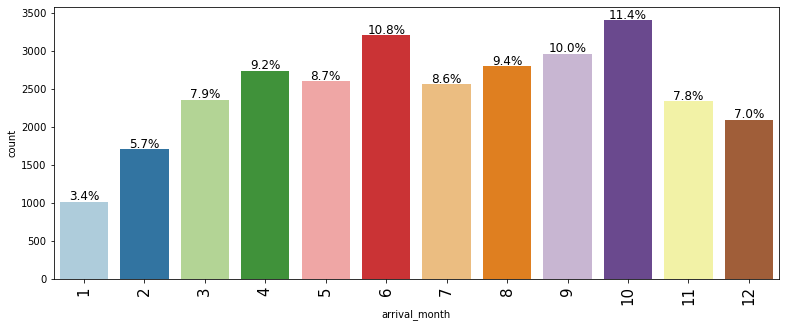

count      mean       std  min  25%  50%   75%   max  \
arrival_month  29761.0  6.935788  3.120907  1.0  4.0  7.0  10.0  12.0   

               missing values   %10    %6    %9   %8   %4  
arrival_month               0  11.4  10.8  10.0  9.4  9.2

In [23]:
check_out_object(booking[booking["arrival_year"]==2018],'arrival_month')

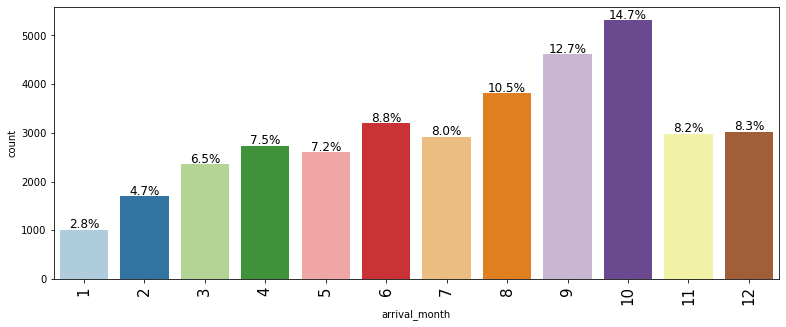

count      mean       std  min  25%  50%   75%   max  \
arrival_month  36275.0  7.423653  3.069894  1.0  5.0  8.0  10.0  12.0   

               missing values   %10    %9    %8   %6  %12  
arrival_month               0  14.7  12.7  10.5  8.8  8.3

In [24]:
check_out_object(booking,'arrival_month')

Let's split the months into seasons.

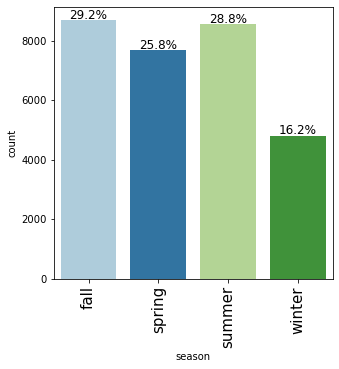

count unique   top  freq  missing values  %fall  %summer  %spring  \
season  29761      4  fall  8699               0   29.2     28.8     25.8   

        %winter  
season     16.2

In [25]:
# is the stay weekend only, weekday only or mixed
def season(month):
    if month==3 or month==4 or month==5 :
        return "spring"
 
    elif month==6 or month==7 or month==8 :
        return "summer"
    elif month==9 or month==10 or month==11 :
        return "fall"
    else:
        return "winter"
booking_new['season']=booking_new.apply(lambda x: season(x['arrival_month']), axis = 1)
check_out_object(booking_new[booking_new["arrival_year"]==2018],'season')

count       mean       std  min  25%   50%   75%   max  \
arrival_date  36275.0  15.596995  8.740447  1.0  8.0  16.0  23.0  31.0   

              unique values  missing values  skewedness  % outliers 2IQR  \
arrival_date             31               0         0.0              0.0   

              % outliers 4IQR  
arrival_date              0.0

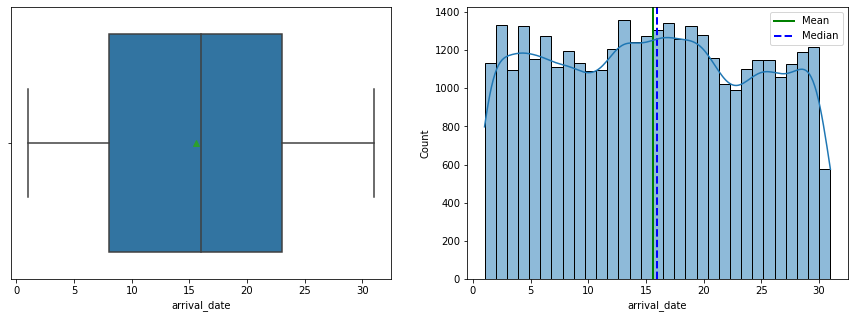

In [26]:
check_number_variable(booking,'arrival_date',bins=31)

- We have data from July 2017 - Dec 2018. We will only look at 2018 for the comparison of all months. 
- Only 18% of the reservations are from 2017
- The busiest month is October followed by Juli and September. 
- Between 25-30% guests come in summer or fall or spring, only 16% come in winter.
- To deal with this later in the analysis, we could either drop 2017 alltogether, or just leave it in there and accept that the result may be a little bit off. Comparing the chart above of all data and only 2018, it isn't so different that we should loose all the other data that comes with the 2017 data. 
- The day of arrival doesn't give us any insight. Especially since it doesn't seem to go one one one with actual dates (s. Appendix)

#### Marketing Segment Type
(Question 2: Which market segment do most of the guests come from?

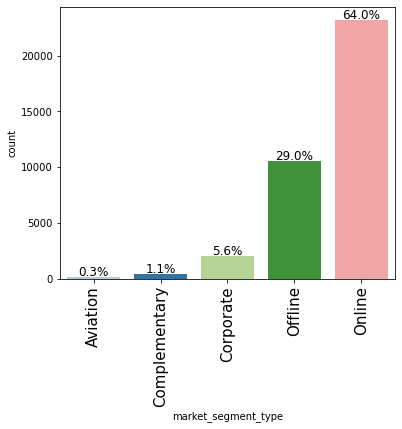

count unique     top   freq  missing values  %Online  \
market_segment_type  36275      5  Online  23214               0     64.0   

                     %Offline  %Corporate  %Complementary  %Aviation  
market_segment_type      29.0         5.6             1.1        0.3

In [27]:
check_out_object(booking,'market_segment_type')

- 64% of the guestsbooked online. 29% made their reservation offline, most likely by calling. 
- Through corperate we get 5.6 reservations. It is not entirely clear what kind of guests those are, but they mostly travel without children and alone (s.below). Maybe staff, though that seems to be a lot.
- Least used are Aviation (.3%)- which again is unclear. And Complementary with 1.1%

#### Previous History

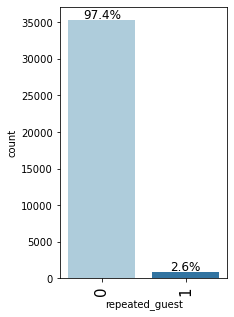

count      mean       std  min  25%  50%  75%  max  \
repeated_guest  36275.0  0.025637  0.158053  0.0  0.0  0.0  0.0  1.0   

                missing values    %0   %1  
repeated_guest               0  97.4  2.6

In [28]:
check_out_object(booking,'repeated_guest')

In [29]:
# making sure only repeat guests have a prior non cancelationhistory
booking[booking['no_of_previous_cancellations']>0]['repeated_guest'].value_counts()

1    338
Name: repeated_guest, dtype: int64

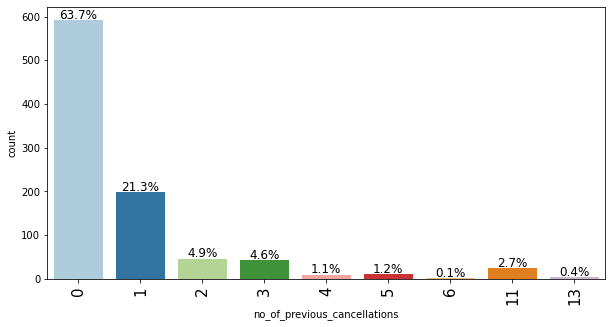

count      mean       std  min  25%  50%  75%  \
no_of_previous_cancellations  930.0  0.910753  2.118551  0.0  0.0  0.0  1.0   

                               max  missing values    %0    %1   %2   %3  %11  
no_of_previous_cancellations  13.0               0  63.7  21.3  4.9  4.6  2.7

In [30]:
check_out_object(booking[booking['repeated_guest']==1],'no_of_previous_cancellations')

In [31]:
# making sure only repeat guests have a prior cancelation history
booking[booking['no_of_previous_cancellations']>0]['repeated_guest'].value_counts()

1    338
Name: repeated_guest, dtype: int64

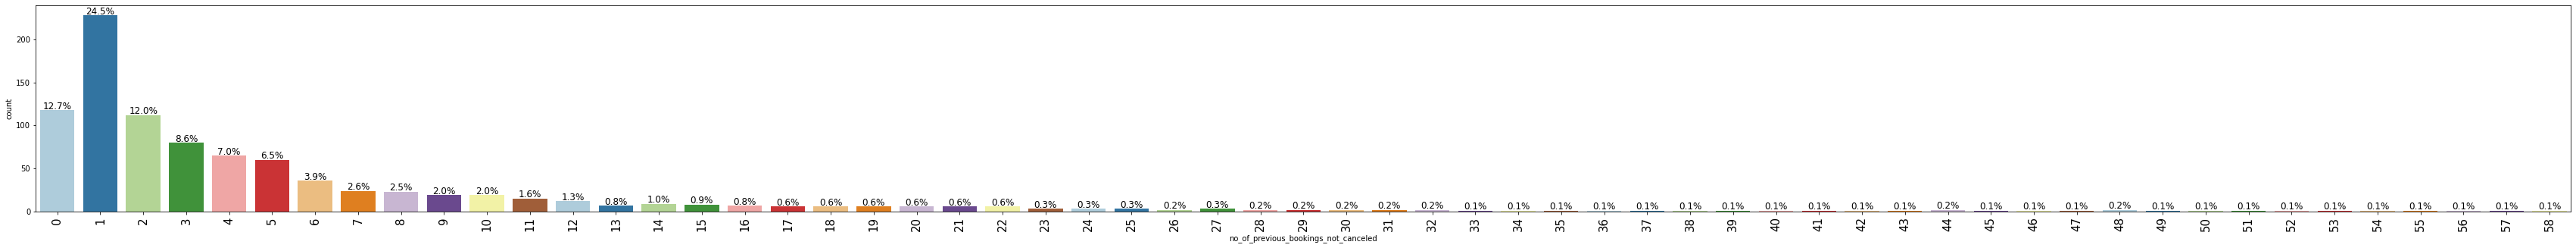

count      mean       std  min  25%  \
no_of_previous_bookings_not_canceled  930.0  5.983871  9.231665  0.0  1.0   

                                      50%  75%   max  missing values    %1  \
no_of_previous_bookings_not_canceled  3.0  6.0  58.0               0  24.5   

                                        %0    %2   %3   %4  
no_of_previous_bookings_not_canceled  12.7  12.0  8.6  7.0

In [32]:
check_out_object(booking[booking['repeated_guest']==1],'no_of_previous_bookings_not_canceled')

In [33]:
#booking_new.drop(['cancel_ratio'],axis=1,inplace=True)

In [34]:
# add new column 'cancel_ration which is 0 when you have never canceled before and 1 if you have only had cancelations'

def cancel_or_not(cancel,notcancel):
    if cancel==0 and notcancel==0: #set this case seperately to avoid division by 0
        return 0
 
    else :
        return round(cancel/(cancel+notcancel),2)
    
booking_new['cancel_ratio']=booking_new.apply(lambda x: cancel_or_not(x['no_of_previous_cancellations'],x['no_of_previous_bookings_not_canceled']), axis = 1)

count      mean       std  min  25%  50%  75%  max  \
cancel_ratio  36275.0  0.004761  0.062163  0.0  0.0  0.0  0.0  1.0   

              unique values  missing values  skewedness  % outliers 2IQR  \
cancel_ratio             40               0        14.9             0.93   

              % outliers 4IQR  
cancel_ratio             0.93

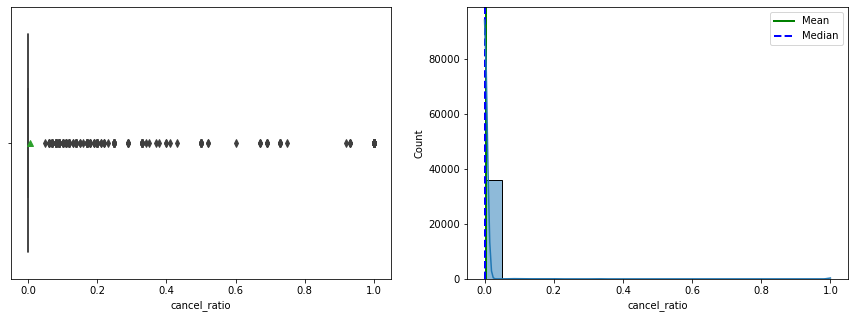

In [35]:
check_number_variable(booking_new[booking_new['cancel_ratio']>=0],'cancel_ratio')

In [36]:
# How many have only canceled?
booking_new[booking_new['cancel_ratio']==1].shape

(118, 24)

- only 2.6% of reservations are made by returning guests
- of those 63% had no prior cancellation, 21% had one and 5% had 2.
- 12.7% had zero previous reservations that were not canceled, 25% had one prior reservation that wasn't canceled.
- most reservations had less prior cancelations than not, but there are 118 who have only ever canceled.

#### Average Price per Room

count        mean        std  min   25%    50%    75%  \
avg_price_per_room  36275.0  103.423539  35.089424  0.0  80.3  99.45  120.0   

                      max  unique values  missing values  skewedness  \
avg_price_per_room  540.0           3930               0         0.7   

                    % outliers 2IQR  % outliers 4IQR  
avg_price_per_room             4.73             0.14

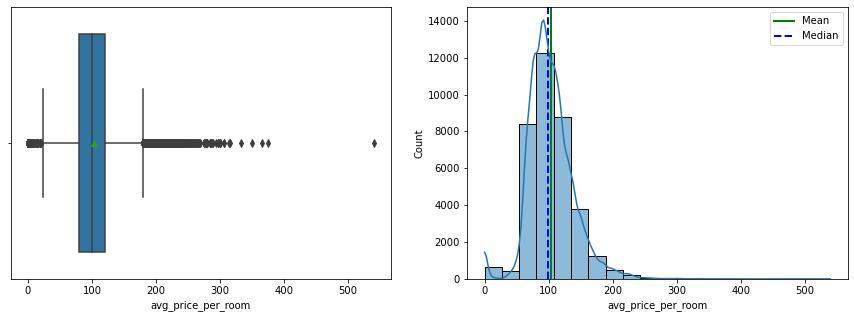

In [37]:
check_number_variable(booking,'avg_price_per_room')

- The price per room ranges from €0-540 with an average of €104.
- The data is right skewed with some outliers.

#### Special Requests


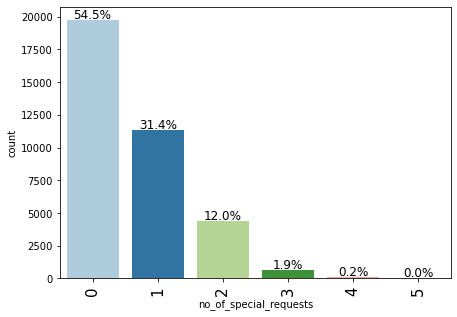

count      mean       std  min  25%  50%  75%  max  \
no_of_special_requests  36275.0  0.619655  0.786236  0.0  0.0  0.0  1.0  5.0   

                        missing values    %0    %1    %2   %3   %4  
no_of_special_requests               0  54.5  31.4  12.0  1.9  0.2

In [38]:
check_out_object(booking,'no_of_special_requests')

- About half the reservations don't come with special requests, 31% have one special request and 12% have 2. Requsets higher than that are below 2%

#### Booking Status


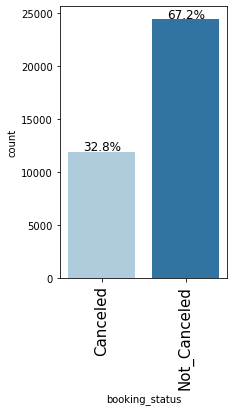

count unique           top   freq  missing values  \
booking_status  36275      2  Not_Canceled  24390               0   

                %Not_Canceled  %Canceled  
booking_status           67.2       32.8

In [39]:
check_out_object(booking,'booking_status')

- 32.8% of all reservations are canceled. (Question 4: What percentage of bookings are canceled?)

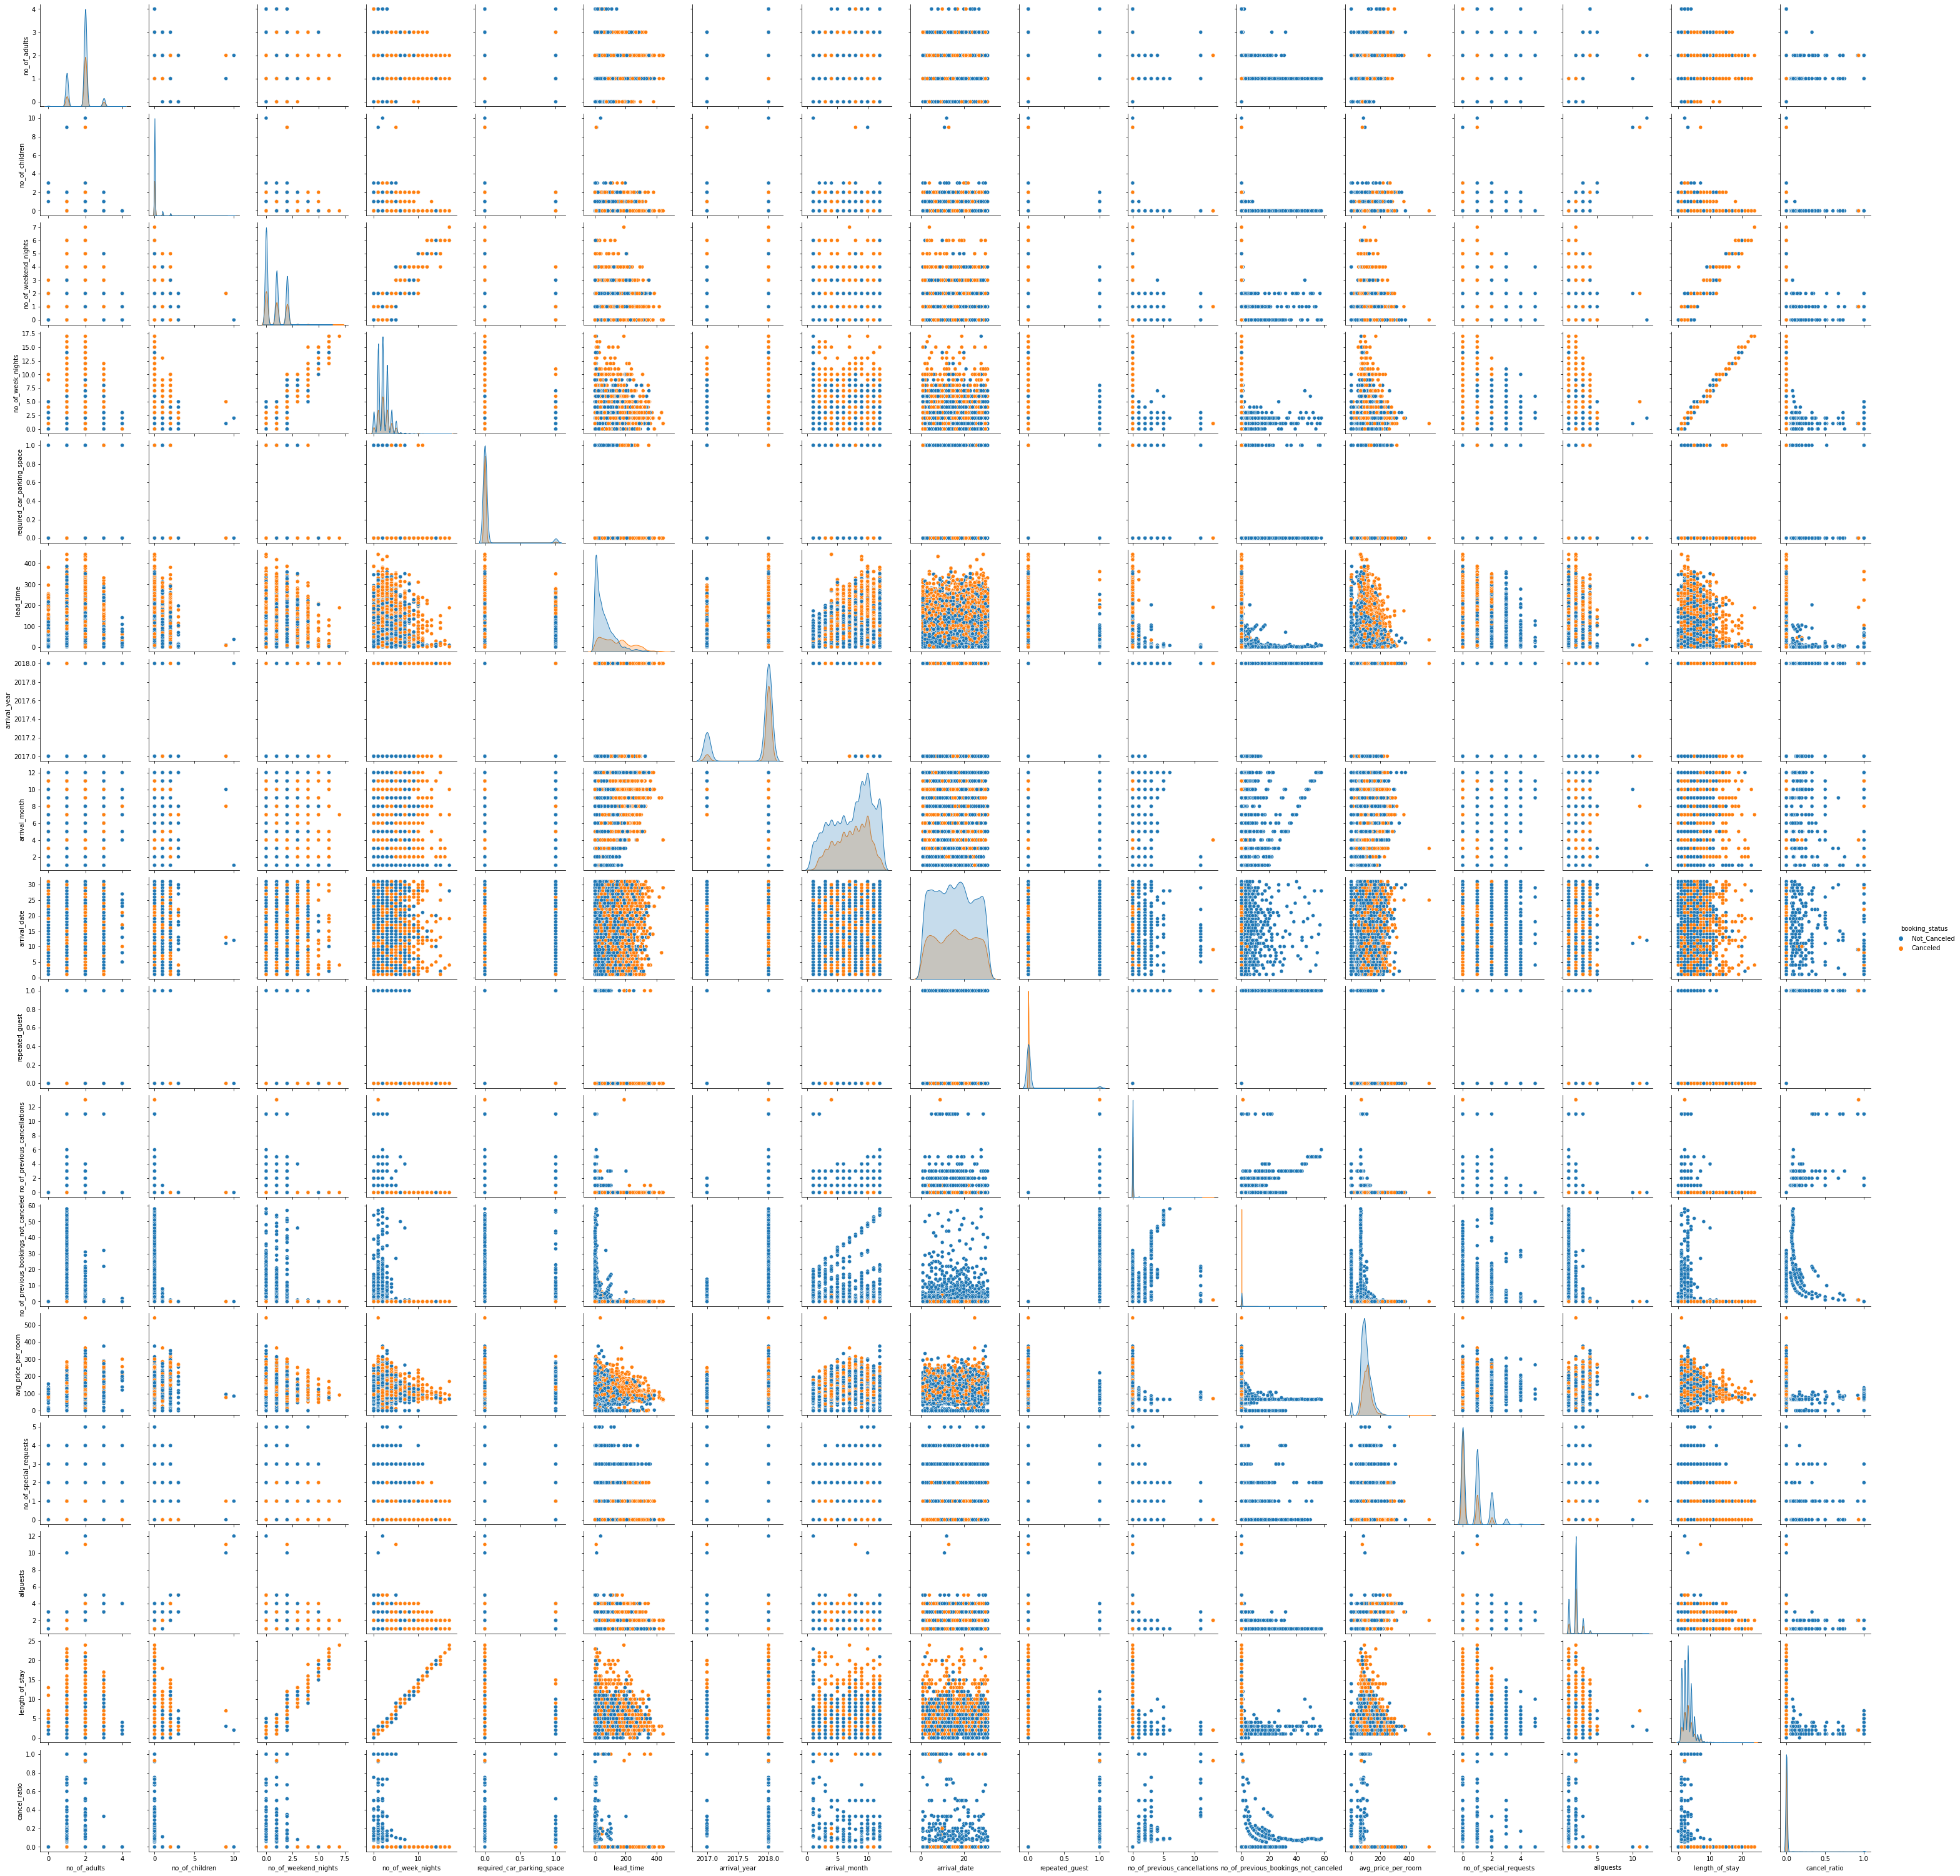

In [40]:
sns.pairplot(booking_new, hue="booking_status")
plt.show()

There are a few obvious correlations through the added variables that will be removed later. Lead time might have some correlation with average price, number of previous bookings and cancelations compared to booking status. The tests will show us for sure.

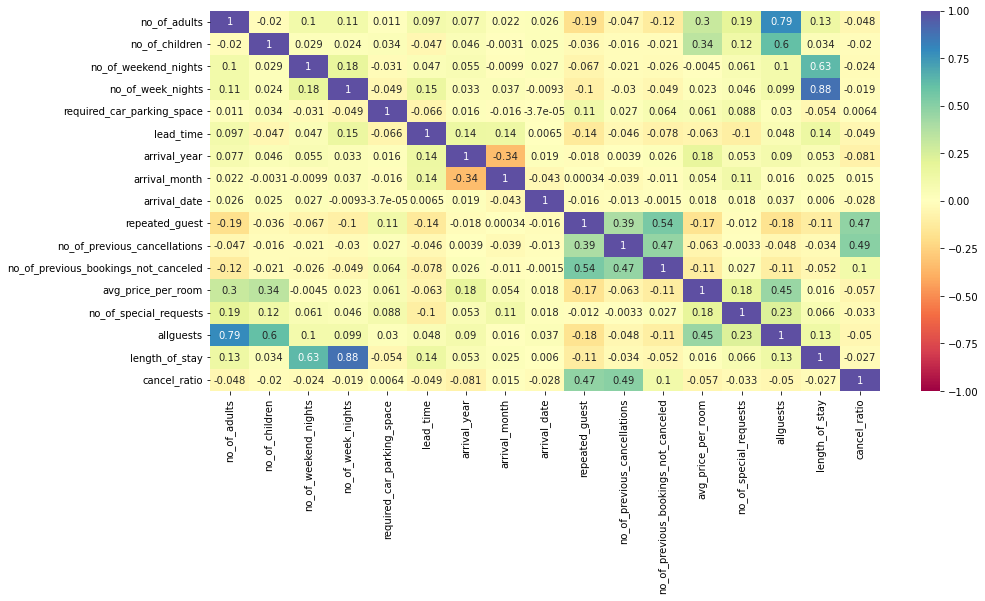

In [41]:
plt.figure(figsize=(15, 7))
sns.heatmap(booking_new.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

- As was to be expected, lenth of stay highly correlates with number of weekdays/weekend days.
- Also cancel_ratio is highly correlated with repeated_guest as is to be expected and allguests with number of adults and number of children to a degree.
- we'll also drop the reservations with 9 and 10 children and the ones without overnight stays now.

In [42]:
#Remove length_of_stay=0
booking_new=booking_new[booking_new['length_of_stay']!=0]
#Remove children over 3
booking_new=booking_new[booking_new['no_of_children']<8]

In [43]:
#make sure rows are gone
booking_new.shape

(36194, 24)

In [44]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    tab1['percent_All']=round(tab1['All']/36275*100,2)
    tab1['percent_Canceled']=round(tab1['Canceled']/tab1['All']*100,2)
    print(tab1)
    
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

booking_status  Canceled  Not_Canceled    All  percent_All  percent_Canceled
no_of_adults                                                                
All                11882         24312  36194        99.78             32.83
2                   9116         16943  26059        71.84             34.98
1                   1856          5808   7664        21.13             24.22
3                    863          1453   2316         6.38             37.26
0                     44            95    139         0.38             31.65
4                      3            13     16         0.04             18.75
------------------------------------------------------------------------------------------------------------------------


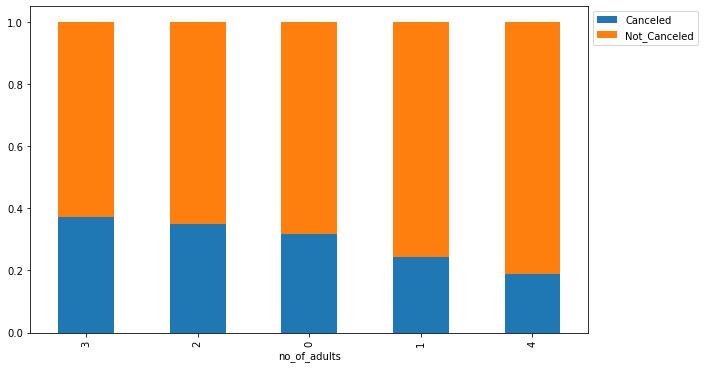

booking_status  Canceled  Not_Canceled    All  percent_All  percent_Canceled
no_of_children                                                              
All                11882         24312  36194        99.78             32.83
0                  10880         22624  33504        92.36             32.47
1                    540          1075   1615         4.45             33.44
2                    457           599   1056         2.91             43.28
3                      5            14     19         0.05             26.32
------------------------------------------------------------------------------------------------------------------------


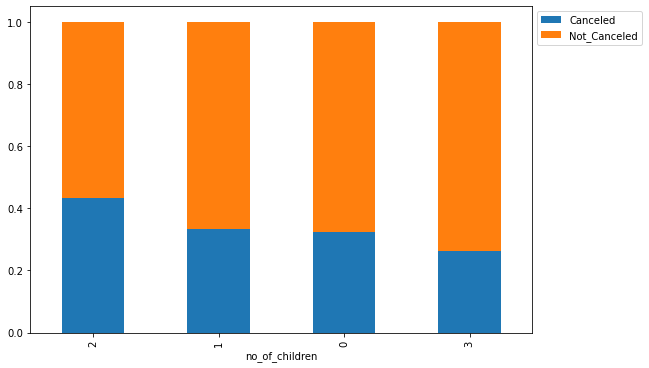

booking_status        Canceled  Not_Canceled    All  percent_All  \
no_of_weekend_nights                                               
All                      11882         24312  36194        99.78   
0                         5091         11702  16793        46.29   
1                         3432          6563   9995        27.55   
2                         3156          5913   9069        25.00   
4                           83            46    129         0.36   
3                           74            79    153         0.42   
5                           29             5     34         0.09   
6                           16             4     20         0.06   
7                            1             0      1         0.00   

booking_status        percent_Canceled  
no_of_weekend_nights                    
All                              32.83  
0                                30.32  
1                                34.34  
2                                34.80  
4    

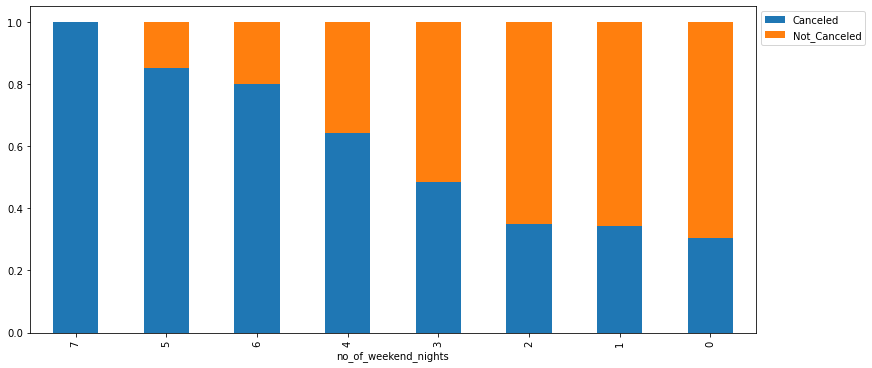

booking_status     Canceled  Not_Canceled    All  percent_All  \
no_of_week_nights                                               
All                   11882         24312  36194        99.78   
2                      3997          7446  11443        31.55   
3                      2574          5265   7839        21.61   
1                      2572          6915   9487        26.15   
4                      1143          1847   2990         8.24   
0                       677          1632   2309         6.37   
5                       631           982   1613         4.45   
6                        88           101    189         0.52   
10                       53             9     62         0.17   
7                        52            61    113         0.31   
8                        32            30     62         0.17   
9                        21            13     34         0.09   
11                       14             3     17         0.05   
15                       

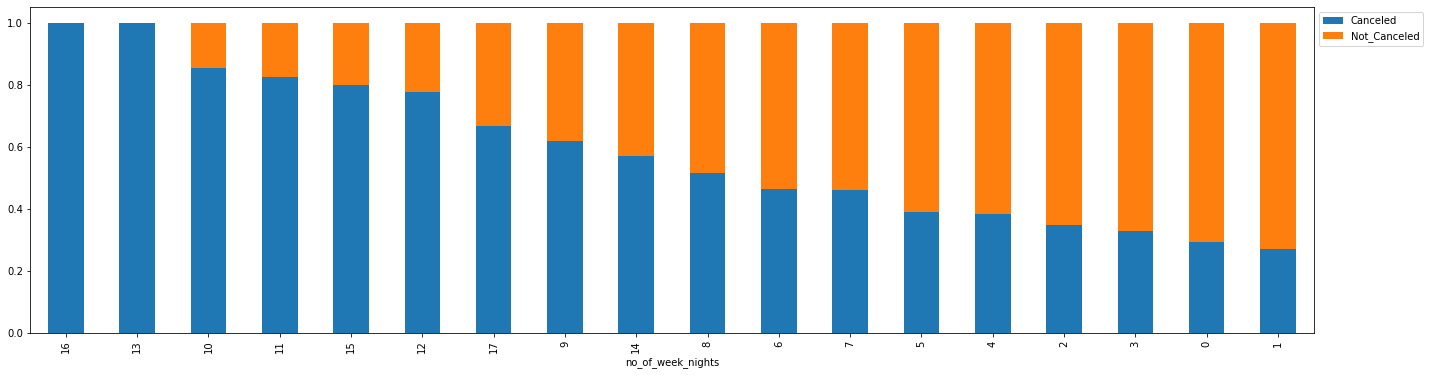

booking_status     Canceled  Not_Canceled    All  percent_All  \
type_of_meal_plan                                               
All                   11882         24312  36194        99.78   
Meal Plan 1            8676         19099  27775        76.57   
Not Selected           1699          3415   5114        14.10   
Meal Plan 2            1506          1794   3300         9.10   
Meal Plan 3               1             4      5         0.01   

booking_status     percent_Canceled  
type_of_meal_plan                    
All                           32.83  
Meal Plan 1                   31.24  
Not Selected                  33.22  
Meal Plan 2                   45.64  
Meal Plan 3                   20.00  
------------------------------------------------------------------------------------------------------------------------


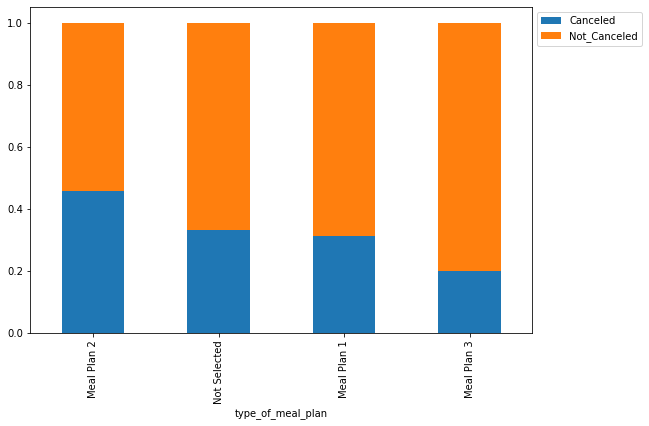

booking_status              Canceled  Not_Canceled    All  percent_All  \
required_car_parking_space                                               
All                            11882         24312  36194        99.78   
0                              11768         23302  35070        96.68   
1                                114          1010   1124         3.10   

booking_status              percent_Canceled  
required_car_parking_space                    
All                                    32.83  
0                                      33.56  
1                                      10.14  
------------------------------------------------------------------------------------------------------------------------


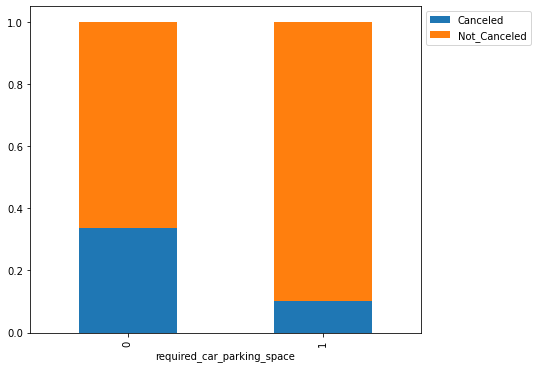

booking_status      Canceled  Not_Canceled    All  percent_All  \
room_type_reserved                                               
All                    11882         24312  36194        99.78   
Room_Type 1             9070         18995  28065        77.37   
Room_Type 4             2069          3978   6047        16.67   
Room_Type 6              406           558    964         2.66   
Room_Type 2              227           462    689         1.90   
Room_Type 5               72           193    265         0.73   
Room_Type 7               36           121    157         0.43   
Room_Type 3                2             5      7         0.02   

booking_status      percent_Canceled  
room_type_reserved                    
All                            32.83  
Room_Type 1                    32.32  
Room_Type 4                    34.22  
Room_Type 6                    42.12  
Room_Type 2                    32.95  
Room_Type 5                    27.17  
Room_Type 7                

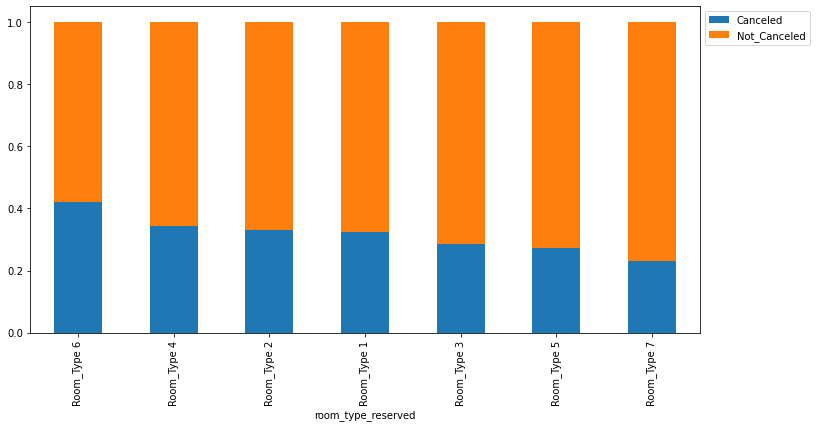

booking_status  Canceled  Not_Canceled    All  percent_All  percent_Canceled
arrival_year                                                                
All                11882         24312  36194        99.78             32.83
2018               10923         18782  29705        81.89             36.77
2017                 959          5530   6489        17.89             14.78
------------------------------------------------------------------------------------------------------------------------


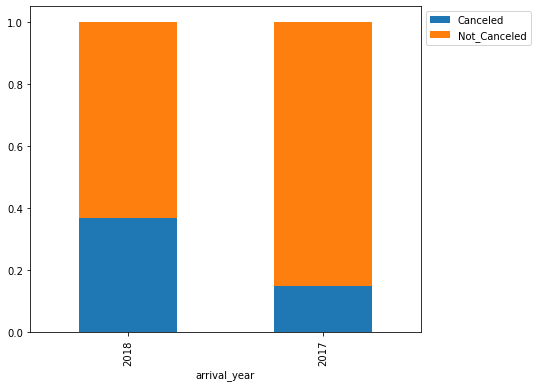

booking_status  Canceled  Not_Canceled    All  percent_All  percent_Canceled
arrival_month                                                               
All                11882         24312  36194        99.78             32.83
10                  1880          3421   5301        14.61             35.47
9                   1537          3066   4603        12.69             33.39
8                   1487          2322   3809        10.50             39.04
7                   1314          1602   2916         8.04             45.06
6                   1290          1907   3197         8.81             40.35
4                    995          1736   2731         7.53             36.43
5                    948          1647   2595         7.15             36.53
11                   875          2096   2971         8.19             29.45
3                    700          1656   2356         6.49             29.71
2                    430          1265   1695         4.67             25.37

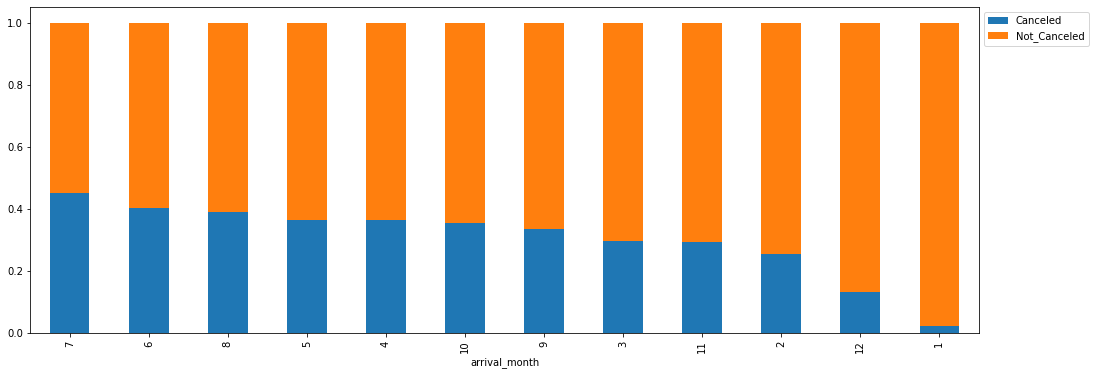

booking_status  Canceled  Not_Canceled    All  percent_All  percent_Canceled
season                                                                      
All                11882         24312  36194        99.78             32.83
fall                4292          8583  12875        35.49             33.34
summer              4091          5831   9922        27.35             41.23
spring              2643          5039   7682        21.18             34.41
winter               856          4859   5715        15.75             14.98
------------------------------------------------------------------------------------------------------------------------


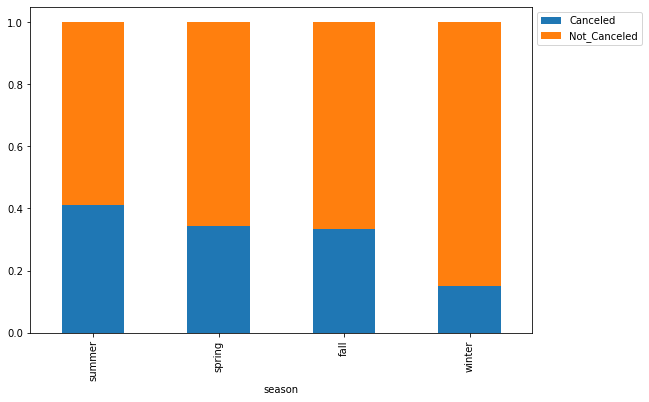

booking_status       Canceled  Not_Canceled    All  percent_All  \
market_segment_type                                               
All                     11882         24312  36194        99.78   
Online                   8472         14675  23147        63.81   
Offline                  3153          7375  10528        29.02   
Corporate                 220          1796   2016         5.56   
Aviation                   37            88    125         0.34   
Complementary               0           378    378         1.04   

booking_status       percent_Canceled  
market_segment_type                    
All                             32.83  
Online                          36.60  
Offline                         29.95  
Corporate                       10.91  
Aviation                        29.60  
Complementary                    0.00  
------------------------------------------------------------------------------------------------------------------------


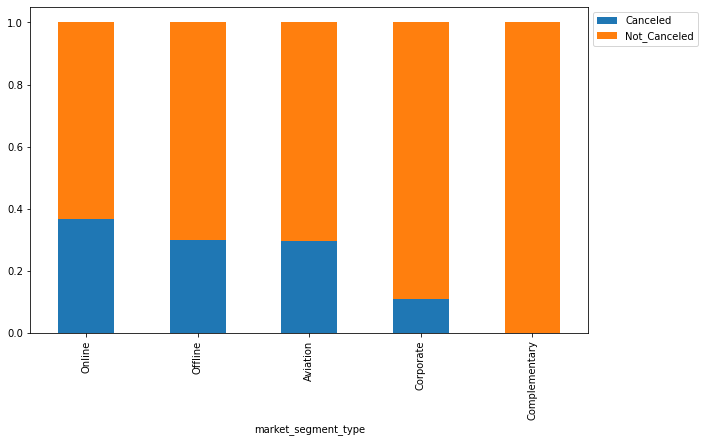

booking_status  Canceled  Not_Canceled    All  percent_All  percent_Canceled
repeated_guest                                                              
All                11882         24312  36194        99.78             32.83
0                  11866         23402  35268        97.22             33.65
1                     16           910    926         2.55              1.73
------------------------------------------------------------------------------------------------------------------------


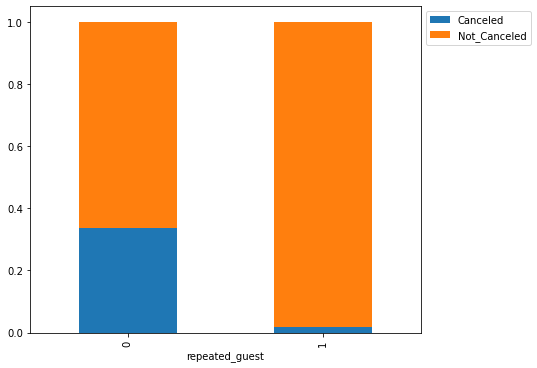

booking_status          Canceled  Not_Canceled    All  percent_All  \
no_of_special_requests                                               
All                        11882         24312  36194        99.78   
0                           8543         11199  19742        54.42   
1                           2702          8635  11337        31.25   
2                            637          3718   4355        12.01   
3                              0           674    674         1.86   
4                              0            78     78         0.22   
5                              0             8      8         0.02   

booking_status          percent_Canceled  
no_of_special_requests                    
All                                32.83  
0                                  43.27  
1                                  23.83  
2                                  14.63  
3                                   0.00  
4                                   0.00  
5                        

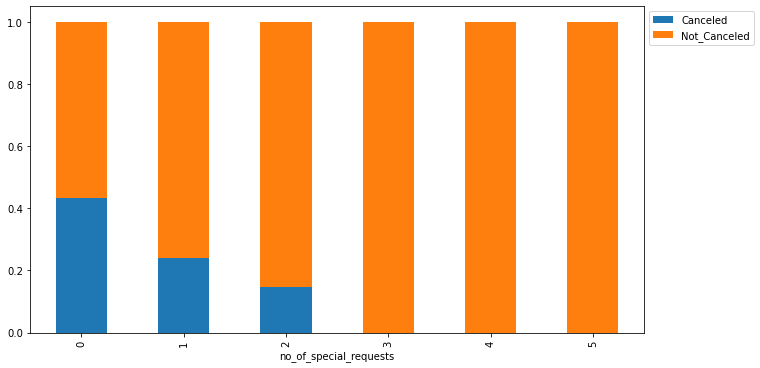

booking_status  Canceled  Not_Canceled    All  percent_All  percent_Canceled
day_of_week                                                                 
All                11882         24312  36194        99.78             32.83
both                6114         10978  17092        47.12             35.77
weekday_only        5091         11702  16793        46.29             30.32
weekend_only         677          1632   2309         6.37             29.32
------------------------------------------------------------------------------------------------------------------------


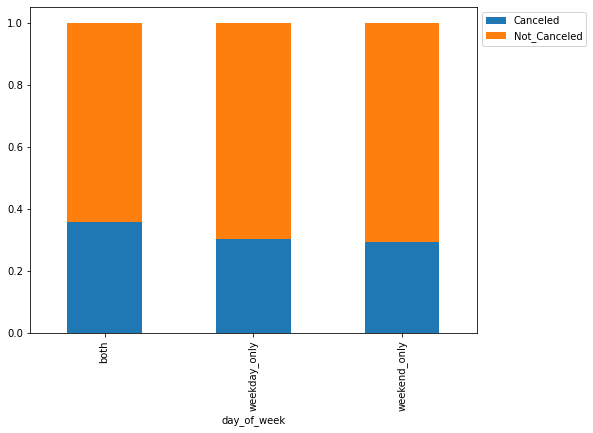

In [45]:
cat_cols = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved','arrival_year','arrival_month','season','market_segment_type', 'repeated_guest','no_of_special_requests', 'day_of_week'
        ]

for i in cat_cols:
    stacked_barplot(booking_new, i, 'booking_status')


#### Observations
- Number of Adults
    - most cancelations occured in bookings with 3 adults (37%), but reservations with 0 and 2 adults also were over 30%. Reservations with one adult was 24%. The lowest were reservations with 4 adults, but there were only 16 of those alltogether.

- Number of Children
    - More reservations with 2 children were canceled (43%) than in any other valid scenario. As mentioned above we'll ignore the reservations for 9&10 children, since there are only 3.
    - Reservations with 1 or no child were canceled about 33% of the time. 
    - Reservations with 3 children were less than with 2 children (26%). I would have expected that number to be higher, because it is more likely for one of 3 kids to get sick than one of 2. But there were also only 19 alltogether for 3 children. 
    
- Number of weekend nights
    - The more weekend nights were booked, the more likely a cancelation. Most cancelations happened when a stay touched at least 2 weekends. 5,6 and 7 days had over 80%, 4 days with 64%. Reservations without weekend days had the least cancelations with 30%. 
    
- Number of weekdays
    - We see the same pattern as for the weekend days. The longer the stay the more likely is a cancelation.0 and 1 weekday stays have a 28%/27% likelihood of being canceled, 2 and 3 35% and 33% respectively and from there it gors up to 85% for 10 days. The remaining 53 reservations with over 11 days are between 58 and 100%.
    
- Meal Plan
    - Most people made a reservation with either breakfast or didn't select a meal plan. Of those the cancelation rate was about average (31% and 33%). The Halfboard Mealplan on the other hand had a cancelation rate of 45%. Fullboard had a cancelation rate of 20%, but only 5 of those were booked.
    
- Required Car Parking Space
    - The reservations that didn't request a car parking space, had a cancelation rate of 33%. The 3% who did request a parking space however only had a cancelation rate of 10%.
    
- Room Type
    - Cancelation rate over the room types varies from room type 7 with 22% to room type 6 with 42%.
    
- Arrival Year
    - The cancelation rate in 2017 was 15% vs. 37% in 2018.
    
- Month of the year
    - The highest cancelation rates occured in July (45%), June & August (40%&39%) 
    - Most people cancel in summer (42%), least in winter (15%).
    
- Marketing Segment Type
    - Online - which were 63% of all reservations - has the highest cancelation rates with 37%, followed by Offline and Aviation (30%), Corperate was 10% and Complementary a whooping 0%.
    
- Repeat Guests
    - Off the first time guests 33.6% canceled their reservations compared to 1.7% of the returning guests. (Question 5: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?)
    
- Number of special requests
    - Cancelation rate of guests who made no special requests were 43%, for one special request it was down to 23% and two requests 14%. 3 or more requests ended in less than 2% of cancelations. (Question 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?)
  
- Day of the week
    - There isn't much difference in the days of the week. The weekend only bookings had 29% cancelation, weekday only 30% and mixed stays had 35%.
    
The variables that seem to drive cancelations up are: 2 children, longer stays, the half board meal plan, certain room types, online booking and not having special requests. 
    

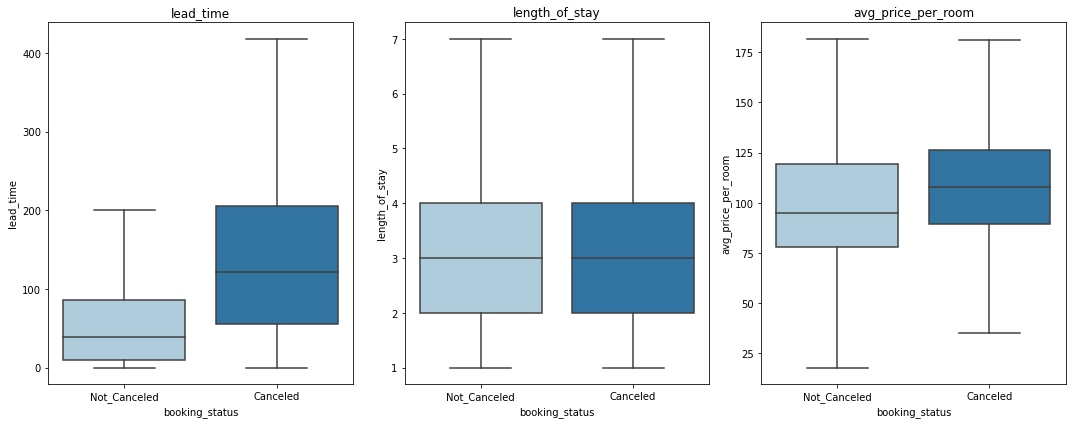

In [46]:
cols = booking_new[
    [
        "lead_time",
        "length_of_stay",
        'avg_price_per_room',
        ]].columns.tolist()

plt.figure(figsize=(15, 6))

for i, variable in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x = 'booking_status', y = variable, data = booking_new, palette="Paired",
         showfliers=False,
    )
    plt.tight_layout()
    
    plt.title(variable)
plt.show()

- most cancellations occur in reservations that had a longer lead time
- length of stay doesn't seem to have an impact on the cancelations
- Cancelations for higher priced rooms are higher.

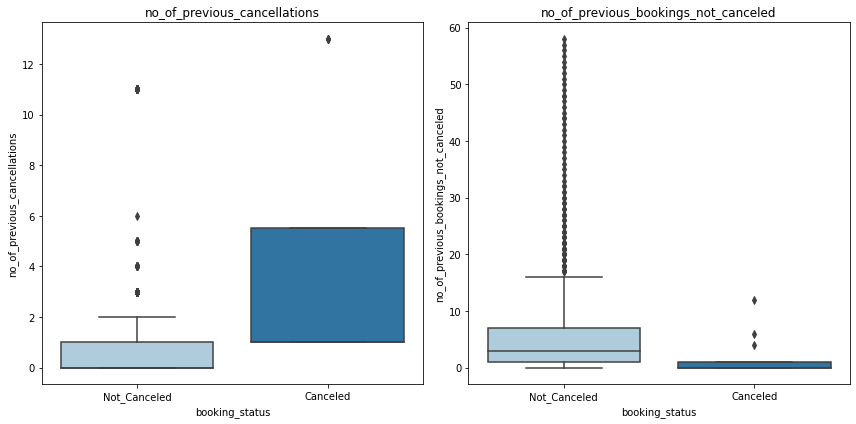

In [47]:
# Cancellations for repeat guests only
cols = booking_new[
    [
        "no_of_previous_cancellations",
        "no_of_previous_bookings_not_canceled", 
    ]
].columns.tolist()

plt.figure(figsize=(12, 6))

for i, variable in enumerate(cols):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x = 'booking_status', y = variable, data = booking_new[booking_new["repeated_guest"]==1], palette="Paired",
         #showfliers=False,  # turning-off outliers
    )
    plt.tight_layout()
    
    plt.title(variable)
plt.show()

- If you are a repeat guest and have canceled at least once, it is very likely that you will cancel again.
- If you do have previous reservations that were not canceled, it is very likely that you won't cancel this one either.

In [48]:
def stacked_barplot_any(data, predictor, target,tab=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    tab: print the table
    """
    count = data[predictor].nunique()
    
    if tab==True:
        tab1 = pd.crosstab(data[predictor], data[target], margins=True)
        print(tab1)
        print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

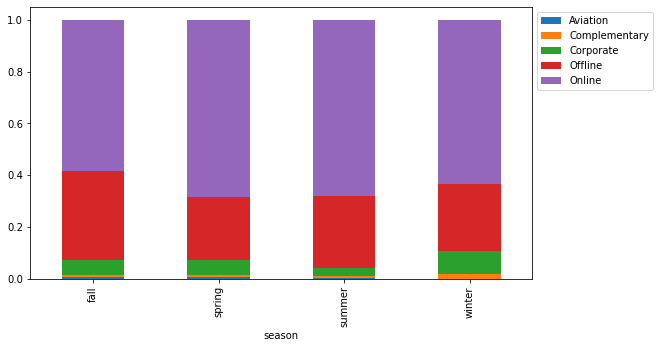

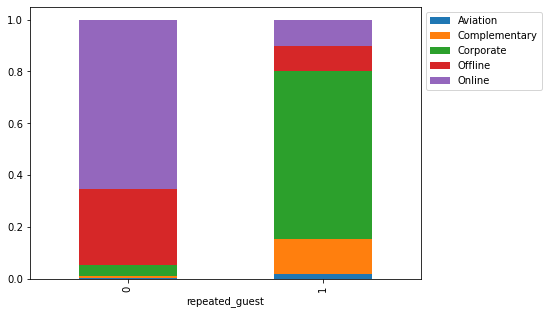

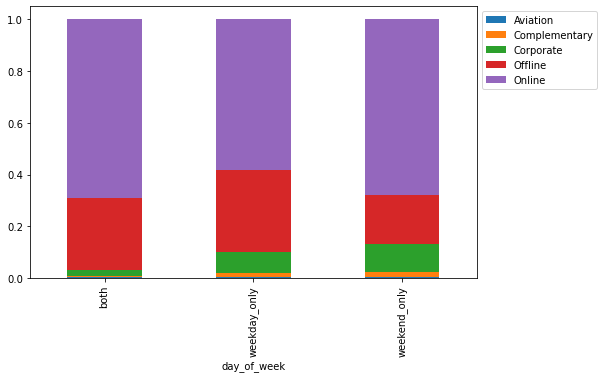

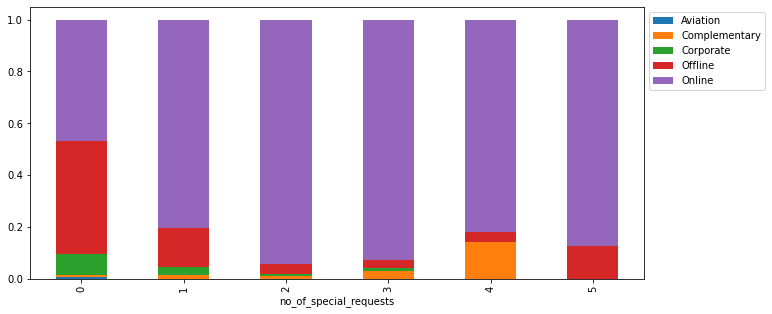

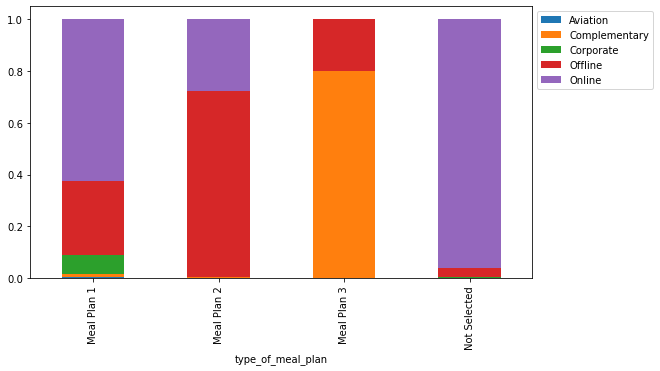

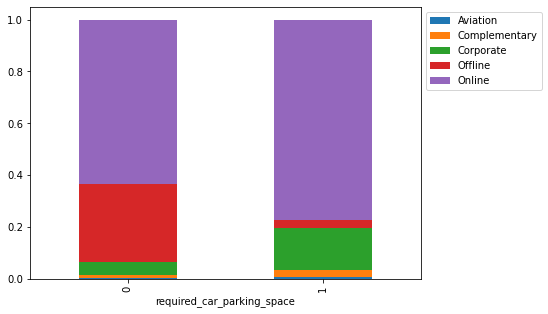

In [49]:
#Comparing market_segment_type with other variables
cat_cols = [
   'season', 'repeated_guest',
       'day_of_week', 'no_of_special_requests','type_of_meal_plan','required_car_parking_space'
]

for i in cat_cols:
    stacked_barplot_any(booking_new, i, 'market_segment_type')

- Most reservations are made online, more so in spring and summer.
- Most repeat guests make their reservation through corporate.
- Reservations for week days and reservations with both weekend days and week days are mostly done online. The weekday only are more times booked offline, whereas the weekend only ones are more often booked through Corperate than the other ones.
- Most special requests come in through online booking. Most likely because you are specifically asked about them when you make the reservation.
- Most people didn't select a meal plan when booking online. 60% of the online reservations that chose breakfast, did so online. Most of the people who ordered half board did so offline. And it seems fullboard couldn't be chosen online. About 80% of those were complementary and the other 20% offline.
- Reservations of guests who required a car parking space came mainly from online reservations or through corporate.

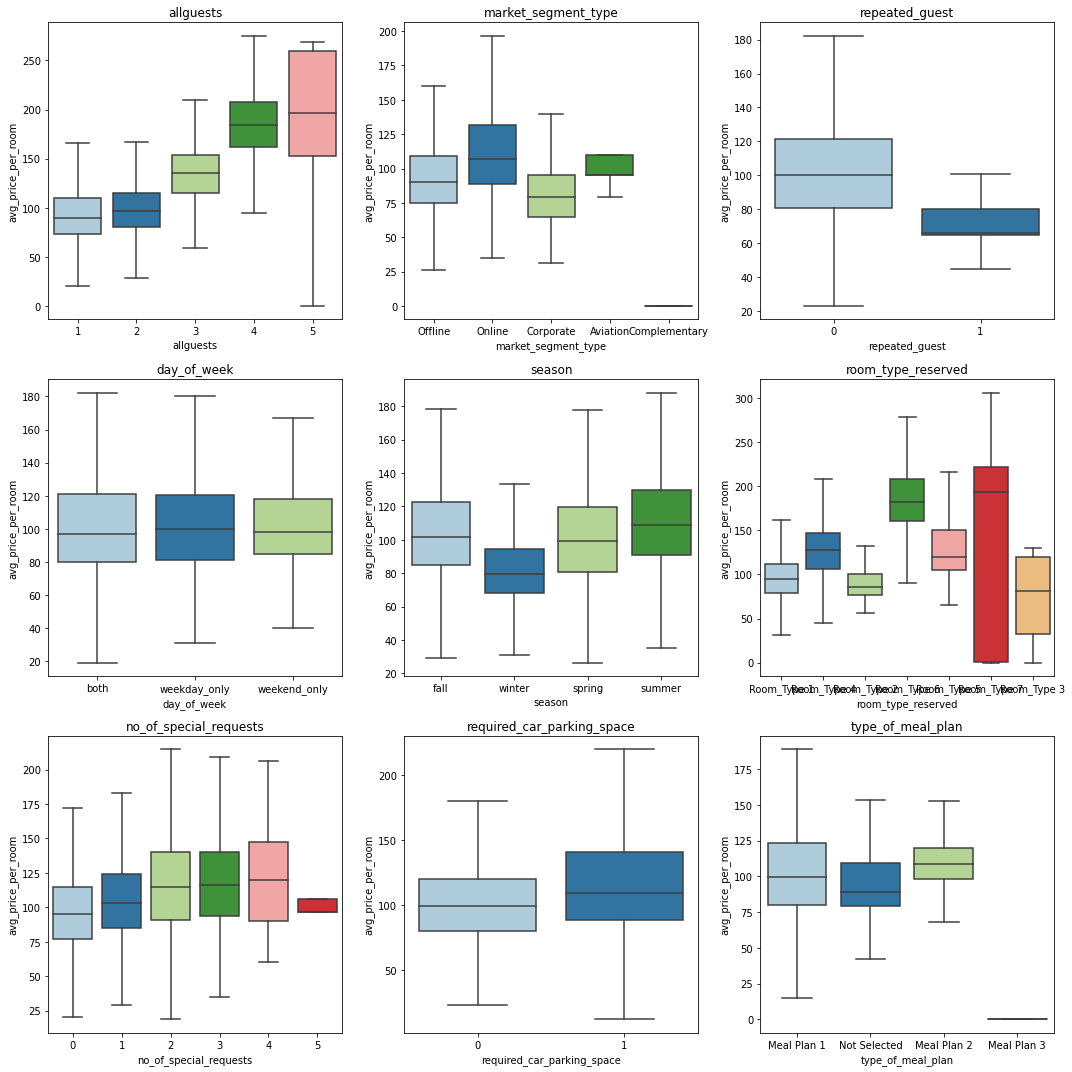

In [50]:
#Comparing room price with other variables
cols = booking_new[
    [
        
        "allguests",
        "market_segment_type",
        "repeated_guest",
        'day_of_week',
        'season',
        'room_type_reserved',
        'no_of_special_requests',
        'required_car_parking_space',
        'type_of_meal_plan'
        
    ]
].columns.tolist()
cols

plt.figure(figsize=(15, 15))

for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = 'avg_price_per_room', x = variable, data = booking_new, palette="Paired",
        showfliers=False,  # turning-off outliers
    )
    plt.tight_layout()
    
    plt.title(variable)
plt.show()

#### Observations
- The room price for 1-2 guests is aproximately the same. Then it gets more expensive with every additional person.
- Online reservations bring in higher prices for roomes as is Aviation. Complementary rooms obviously bring in no money.
- Returning guests pay less.
- There is no obvious difference in the price for rooms on weekends or week days.
- Room prices are the highest in Summer, but not much more than in spring or fall. They are much lower in winter.
- Reservations with no special requests are cheaper than with one request which in turn are cheaper than 2 requests. After that it kind of evens out. (Question 3: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?)
- In general you pay more if a parking space is required.In general the price is a bit higher if breakfast was ordered. The second meal didn't really make a difference.


The cancelations or not cancelations for the car parking spot stood out. So let's take a look at that.

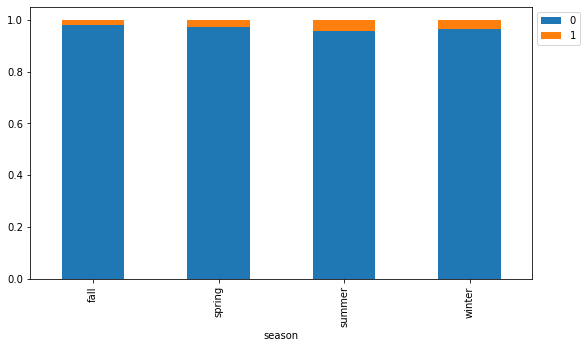

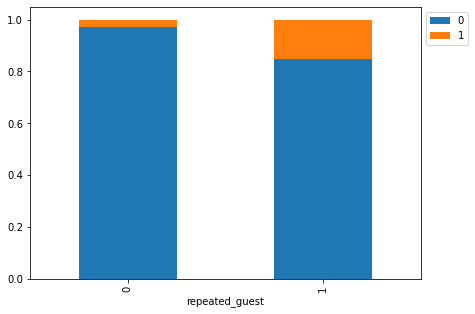

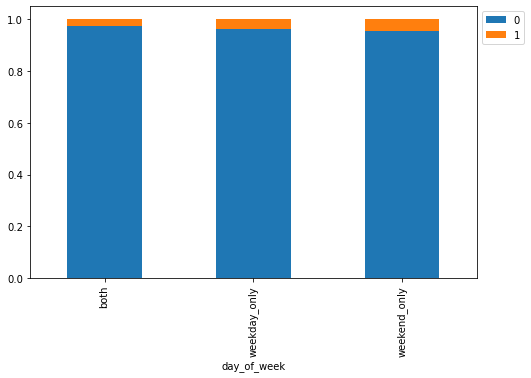

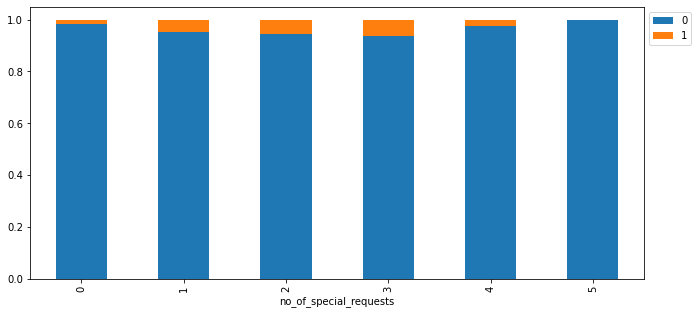

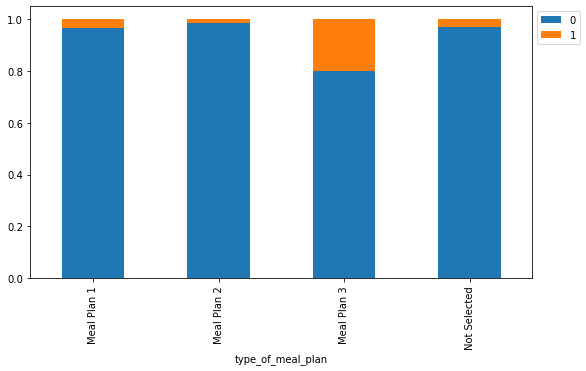

In [51]:
#Comparing market_segment_type with other variables
cat_cols = [
   'season', 'repeated_guest',
       'day_of_week', 'no_of_special_requests','type_of_meal_plan'
]

for i in cat_cols:
    stacked_barplot_any(booking_new, i, 'required_car_parking_space')

Most guests who require a parking spot are repeat guests with Meal Plan 3 and a lot of those came through Corperate. 

In [52]:
booking[booking['repeated_guest']==1]['no_of_children'].value_counts()

0    917
1     12
2      1
Name: no_of_children, dtype: int64

Most returning guests travel without children.

**Leading Questions**:
The Questions are all answered above.
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

- There are no missing values or duplicates we need to take care of. 
- We'll drop Booking ID, arrival date,arrival_month and arrival_year and allguests .
- I'll drop 'no_of_weekend_nights' and 'no_of_week_nights' and keep 'days_of_week', 'length_of_stay', '.
- I'll also drop 'cancel_ratio' .
- Drop arrival year, since 2017 only has partial data so from 2017 to 2018 we can't really get a trend.
- Change booking status to 1 (canceled) and 0 (not canceled)


In [53]:
# dropping columns
booking_model=booking_new[booking_new['length_of_stay']!=0].drop(['Booking_ID', 'no_of_weekend_nights',"no_of_week_nights","arrival_date","arrival_month",'arrival_year','cancel_ratio','allguests'], axis=1).copy()

In [54]:
# changing booking status
booking_model.loc[booking_model['booking_status']=='Canceled','booking_status']=1
booking_model.loc[booking_model['booking_status']=='Not_Canceled','booking_status']=0
booking_model['booking_status']=booking_model['booking_status'].astype(str).astype(int)
booking_model['booking_status'].value_counts()

0    24312
1    11882
Name: booking_status, dtype: int64

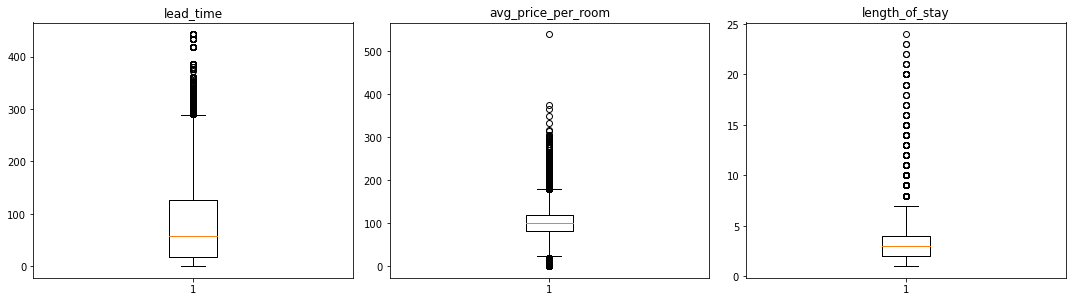

In [55]:
# outlier detection using boxplot
numeric_columns = booking_model.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable

outlier_cols=['lead_time','avg_price_per_room','length_of_stay']

plt.figure(figsize=(15, 8))

for i, variable in enumerate(outlier_cols):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(booking_model[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

lead_time and length_of_stay outliers look ok, but let's take a closer look at that avg_price_per_room that looks suspicious.

In [56]:
booking_model[booking_model['avg_price_per_room']>400].describe(include='all').T

count unique           top freq   mean  \
no_of_adults                           1.0    NaN           NaN  NaN    2.0   
no_of_children                         1.0    NaN           NaN  NaN    0.0   
type_of_meal_plan                        1      1   Meal Plan 1    1    NaN   
required_car_parking_space             1.0    NaN           NaN  NaN    0.0   
room_type_reserved                       1      1   Room_Type 1    1    NaN   
lead_time                              1.0    NaN           NaN  NaN   35.0   
market_segment_type                      1      1       Offline    1    NaN   
repeated_guest                         1.0    NaN           NaN  NaN    0.0   
no_of_previous_cancellations           1.0    NaN           NaN  NaN    0.0   
no_of_previous_bookings_not_canceled   1.0    NaN           NaN  NaN    0.0   
avg_price_per_room                     1.0    NaN           NaN  NaN  540.0   
no_of_special_requests                 1.0    NaN           NaN  NaN    0.0   
booking_status                         1.0    NaN           NaN  NaN    1.0   
length_of_stay                         1.0    NaN           NaN  NaN    1.0   
day_of_week                              1      1  weekday_only    1    NaN   
season                                   1      1        spring    1    NaN   

                                      std    min    25%    50%    75%    max  
no_of_adults                          NaN    2.0    2.0    2.0    2.0    2.0  
no_of_children                        NaN    0.0    0.0    0.0    0.0    0.0  
type_of_meal_plan                     NaN    NaN    NaN    NaN    NaN    NaN  
required_car_parking_space            NaN    0.0    0.0    0.0    0.0    0.0  
room_type_reserved                    NaN    NaN    NaN    NaN    NaN    NaN  
lead_time                             NaN   35.0   35.0   35.0   35.0   35.0  
market_segment_type                   NaN    NaN    NaN    NaN    NaN    NaN  
repeated_guest                        NaN    0.0    0.0    0.0    0.0    0.0  
no_of_previous_cancellations          NaN    0.0    0.0    0.0    0.0    0.0  
no_of_previous_bookings_not_canceled  NaN    0.0    0.0    0.0    0.0    0.0  
avg_price_per_room                    NaN  540.0  540.0  540.0  540.0  540.0  
no_of_special_requests                NaN    0.0    0.0    0.0    0.0    0.0  
booking_status                        NaN    1.0    1.0    1.0    1.0    1.0  
length_of_stay                        NaN    1.0    1.0    1.0    1.0    1.0  
day_of_week                           NaN    NaN    NaN    NaN    NaN    NaN  
season                                NaN    NaN    NaN    NaN    NaN    NaN

This reservation doesn't look out of the ordinary. Maybe they accidentally entered 540 instead of 54. But I'm not sure, so before messing up the data, I'll just remove this line. 

In [57]:
# removing price outlier
booking_model=booking_model[booking_model['avg_price_per_room']<400]

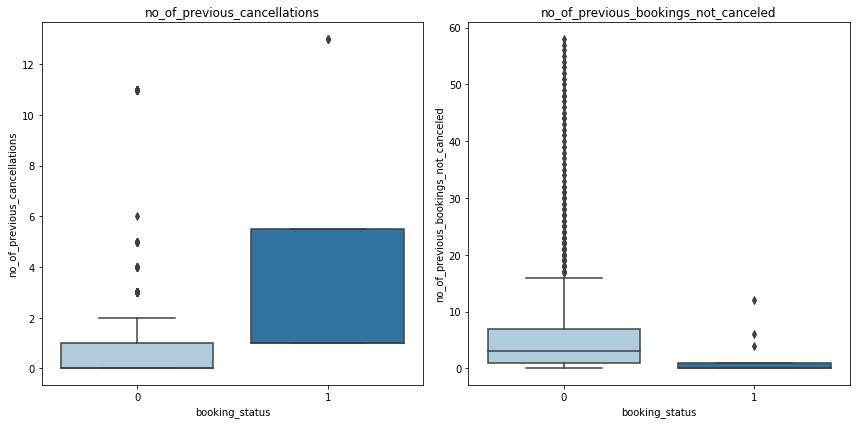

In [58]:
# Cancellations for repeat guests only
cols = booking_new[
    [
        "no_of_previous_cancellations",
        "no_of_previous_bookings_not_canceled", 
    ]
].columns.tolist()

plt.figure(figsize=(12, 6))

for i, variable in enumerate(cols):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x = 'booking_status', y = variable, data = booking_model[booking_model["repeated_guest"]==1], palette="Paired",
         #showfliers=False,  # turning-off outliers
    )
    plt.tight_layout()
    
    plt.title(variable)
plt.show()

In [59]:
#looking at the outlier with the 13 previous cancelations
booking[booking['no_of_previous_cancellations']>12]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
12097   INN12098             2               0                     1   
12109   INN12110             2               0                     1   
16277   INN16278             2               0                     1   
30833   INN30834             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
12097                  1       Meal Plan 1                           0   
12109                  1       Meal Plan 1                           0   
16277                  1       Meal Plan 1                           0   
30833                  1       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
12097        Room_Type 1        190          2018              4   
12109        Room_Type 1        190          2018              4   
16277        Room_Type 1        190          2018              4   
30833        Room_Type 1        190          2018              4   

       arrival_date market_segment_type  repeated_guest  \
12097             9             Offline               1   
12109             9             Offline               1   
16277             9             Offline               1   
30833             9             Offline               1   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
12097                            13                                     1   
12109                            13                                     1   
16277                            13                                     1   
30833                            13                                     1   

       avg_price_per_room  no_of_special_requests booking_status  
12097                70.0                       0       Canceled  
12109                70.0                       0       Canceled  
16277                70.0                       0       Canceled  
30833                70.0                       0       Canceled

Those are the exact same reservations made at the same day. It is highly unlikely that 4 different people who all have canceled 13 times before make the exact same reservation on the same day. Maybe something was wrong with the system that day or the persons internet was slow. We've all been there.
And once those reservations were canceled the number of previous cancelations should go up every time. The system doesn't seem too trustworthy here, so just to account for accidental double bookings and the cancelations that come with it, I'll cut the outliers for number of cancelations down to 6 (top of 75% in cancelations of repeated guests) 

In [60]:
booking_model.loc[booking_model['no_of_previous_cancellations']>6,'no_of_previous_cancellations']=6

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [61]:
checkthedata(booking_model)

no_of_adults  no_of_children type_of_meal_plan  required_car_parking_space  \
0             2               0       Meal Plan 1                           0   
1             2               0      Not Selected                           0   

  room_type_reserved  lead_time market_segment_type  repeated_guest  \
0        Room_Type 1        224             Offline               0   
1        Room_Type 1          5              Online               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   

   avg_price_per_room  no_of_special_requests  booking_status  length_of_stay  \
0               65.00                       0               0               3   
1              106.68                       1               0               5   

  day_of_week season  
0        both   fall  
1        both   fall

no_of_adults  no_of_children type_of_meal_plan  \
36273             2               0      Not Selected   
36274             2               0       Meal Plan 1   

       required_car_parking_space room_type_reserved  lead_time  \
36273                           0        Room_Type 1         63   
36274                           0        Room_Type 1        207   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
36273              Online               0                             0   
36274             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
36273                                     0               94.50   
36274                                     0              161.67   

       no_of_special_requests  booking_status  length_of_stay   day_of_week  \
36273                       0               1               3  weekday_only   
36274                       0               0               3          both   

       season  
36273  spring  
36274  winter

no_of_adults  no_of_children type_of_meal_plan  \
1749              1               0      Not Selected   
10060             1               0       Meal Plan 1   
3483              2               2       Meal Plan 1   
30050             2               0       Meal Plan 1   
33555             2               1       Meal Plan 1   
25913             1               0       Meal Plan 1   
4410              2               0      Not Selected   
1142              1               0       Meal Plan 1   
25116             2               0      Not Selected   
6876              2               0       Meal Plan 1   

       required_car_parking_space room_type_reserved  lead_time  \
1749                            0        Room_Type 1          8   
10060                           0        Room_Type 2        206   
3483                            0        Room_Type 6        207   
30050                           0        Room_Type 1         35   
33555                           0        Room_Type 4        186   
25913                           0        Room_Type 1        215   
4410                            0        Room_Type 1        145   
1142                            0        Room_Type 1        276   
25116                           0        Room_Type 1         33   
6876                            0        Room_Type 1         75   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
1749               Online               0                             0   
10060              Online               0                             0   
3483               Online               0                             0   
30050              Online               0                             0   
33555              Online               0                             0   
25913              Online               0                             0   
4410               Online               0                             0   
1142              Offline               0                             0   
25116              Online               0                             0   
6876               Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
1749                                      0              119.00   
10060                                     0              126.90   
3483                                      0              168.30   
30050                                     0              144.90   
33555                                     0              112.20   
25913                                     0              100.80   
4410                                      0              108.00   
1142                                      0               95.67   
25116                                     0              108.00   
6876                                      0               72.25   

       no_of_special_requests  booking_status  length_of_stay   day_of_week  \
1749                        0               1               1  weekday_only   
10060                       1               1               3  weekday_only   
3483                        1               1               1  weekday_only   
30050                       1               0               1  weekend_only   
33555                       1               1               7          both   
25913                       2               1               4  weekday_only   
4410                        1               1               3          both   
1142                        0               0               3  weekday_only   
25116                       0               0               3          both   
6876                        2               0               1  weekend_only   

       season  
1749   spring  
10060    fall  
3483   summer  
30050  summer  
33555  summer  
25913  spring  
4410     fall  
1142     fall  
25116    fall  
6876     fall

There are 36193 rows and 16 columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36193 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36193 non-null  int64  
 1   no_of_children                        36193 non-null  int64  
 2   type_of_meal_plan                     36193 non-null  object 
 3   required_car_parking_space            36193 non-null  int64  
 4   room_type_reserved                    36193 non-null  object 
 5   lead_time                             36193 non-null  int64  
 6   market_segment_type                   36193 non-null  object 
 7   repeated_guest                        36193 non-null  int64  
 8   no_of_previous_cancellations          36193 non-null  int64  
 9   no_of_previous_bookings_not_canceled  36193 non-null  int64  
 10  avg_price_per_room                    36193 

None


Describe Data:

Numerical Variables:


count        mean        std  min  \
no_of_adults                          36193.0    1.845440   0.518645  0.0   
no_of_children                        36193.0    0.104551   0.393862  0.0   
required_car_parking_space            36193.0    0.031056   0.173471  0.0   
lead_time                             36193.0   85.320863  85.939048  0.0   
repeated_guest                        36193.0    0.025585   0.157896  0.0   
no_of_previous_cancellations          36193.0    0.019147   0.250427  0.0   
no_of_previous_bookings_not_canceled  36193.0    0.153483   1.755883  0.0   
avg_price_per_room                    36193.0  103.635867  34.722635  0.0   
no_of_special_requests                36193.0    0.619484   0.786391  0.0   
booking_status                        36193.0    0.328268   0.469589  0.0   
length_of_stay                        36193.0    3.021496   1.782378  1.0   

                                        25%   50%     75%    max  
no_of_adults                           2.00   2.0    2.00    4.0  
no_of_children                         0.00   0.0    0.00    3.0  
required_car_parking_space             0.00   0.0    0.00    1.0  
lead_time                             17.00  57.0  126.00  443.0  
repeated_guest                         0.00   0.0    0.00    1.0  
no_of_previous_cancellations           0.00   0.0    0.00    6.0  
no_of_previous_bookings_not_canceled   0.00   0.0    0.00   58.0  
avg_price_per_room                    80.75  99.6  120.12  375.5  
no_of_special_requests                 0.00   0.0    1.00    5.0  
booking_status                         0.00   0.0    1.00    1.0  
length_of_stay                         2.00   3.0    4.00   24.0


Non Numerical Variables:


count unique          top   freq
type_of_meal_plan    36193      4  Meal Plan 1  27774
room_type_reserved   36193      7  Room_Type 1  28064
market_segment_type  36193      5       Online  23147
day_of_week          36193      3         both  17092
season               36193      4         fall  12875


Missing Values:
no_of_adults                            0
no_of_children                          0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
length_of_stay                          0
day_of_week                             0
season                                  0
dtype: int64

Duplicates:
10612


The data looks good. We have a lot more duplicates now, which makes sense with the Booking ID and the arrival_date gone. 


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

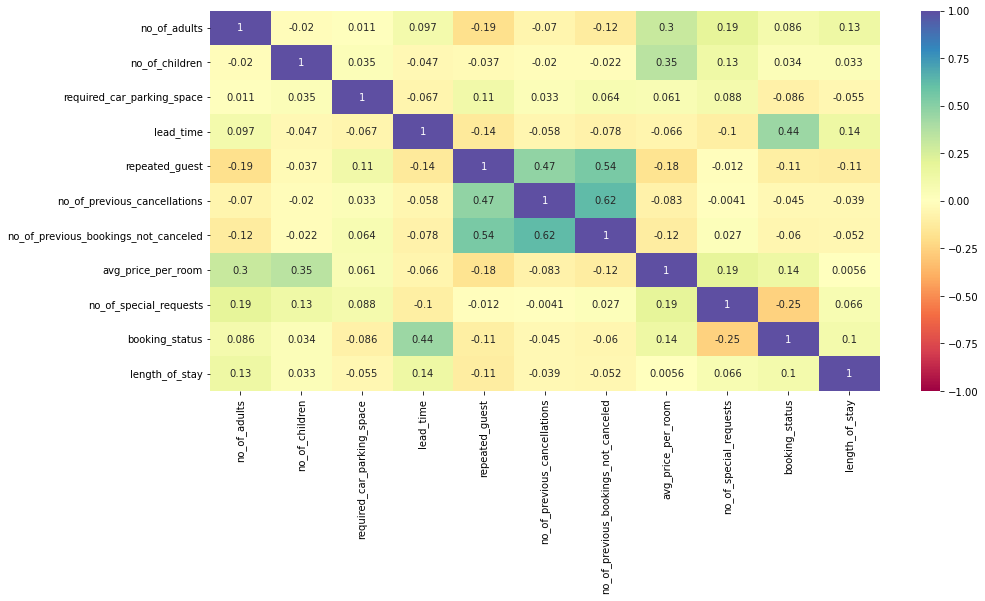

In [62]:
plt.figure(figsize=(15, 7))
sns.heatmap(booking_model.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

There is no more colliniarities here that we need to take care of right now.


### Model evaluation criterion

#### Model can make wrong predictions as:
- Predicting a reservation will be canceled but in reality the reservation won't be canceled. (False positive)

- Predicting a reservation won't be canceled but in reality the reservation will be canceled. (False Negative)

#### Which case is more important?
- If we predict a reservation won't be canceled, but will be, the hotel looses (revenue) when they  cannot resell the room. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin. 

- If we predict the reservation will be canceled, but the guests show up, most of the time, the hotel can just assign another room. It might not be able to fulfill all the requirements of the customers. If the hotel is full however and has given away the room under the assumtion that it will be canceled, there will be very unhappy customers that need to find new accomodations. The hotel will have to find and pay for the customers new accomodations, some way most likely monetary of making it up to the customers and they will get bad reviews, which in turn cost money.

Both cases are equally bad. We need to reduce both cases as much as possible, so we'll focus on the F1 score.

## Building a Logistic Regression model

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
The model_performance_classification_statsmodels function will be used to check the model performance of models.
The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [64]:
# Creating Training and Test Data
X = booking_model.drop(["booking_status"], axis=1)
Y = booking_model["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)


In [65]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25335, 29)
Shape of test set :  (10858, 29)
Percentage of classes in training set:
0    0.670022
1    0.329978
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.675723
1    0.324277
Name: booking_status, dtype: float64


In [66]:
#making sure only number columns are left
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36193 entries, 0 to 36274
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36193 non-null  float64
 1   no_of_adults                          36193 non-null  int64  
 2   no_of_children                        36193 non-null  int64  
 3   required_car_parking_space            36193 non-null  int64  
 4   lead_time                             36193 non-null  int64  
 5   repeated_guest                        36193 non-null  int64  
 6   no_of_previous_cancellations          36193 non-null  int64  
 7   no_of_previous_bookings_not_canceled  36193 non-null  int64  
 8   avg_price_per_room                    36193 non-null  float64
 9   no_of_special_requests                36193 non-null  int64  
 10  length_of_stay                        36193 non-null  int64  
 11  type_of_meal_pl

In [67]:
# run the model for a first look
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25335
Model:                          Logit   Df Residuals:                    25306
Method:                           MLE   Df Model:                           28
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3286
Time:                        13:50:03   Log-Likelihood:                -10787.
converged:                      False   LL-Null:                       -16067.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.6867      0.254    -10.573      0.000      -3.185      -2.189
no_of_adults                             0.1143      

In [68]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.802842  0.636483   0.731208  0.680565

Check for multi-collinearity with the variance inflation factor (VIF)

In [69]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   298.083106
no_of_adults                              1.356730
no_of_children                            2.063839
required_car_parking_space                1.038988
lead_time                                 1.276768
repeated_guest                            1.792455
no_of_previous_cancellations              1.690732
no_of_previous_bookings_not_canceled      1.875097
avg_price_per_room                        2.179978
no_of_special_requests                    1.251578
length_of_stay                            1.558689
type_of_meal_plan_Meal Plan 2             1.201594
type_of_meal_plan_Meal Plan 3             1.012138
type_of_meal_plan_Not Selected            1.248299
room_type_reserved_Room_Type 2            1.091718
room_type_reserved_Room_Type 3            1.003516
room_type_reserved_Room_Type 4            1.362938
room_type_reserved_Room_Type 5            1.035784
room_type_reserved_Room_Type 6            2.026

Since the market segments come up as multi-collinear, I will change the column into online and not online. This can be achieved by dropping all columns except market_segment_type_Online 

In [70]:
X_train1 = X_train.drop(["market_segment_type_Complementary","market_segment_type_Corporate","market_segment_type_Offline","market_segment_type_Offline"], axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
cols_dropped=["market_segment_type_Complementary","market_segment_type_Corporate","market_segment_type_Offline","market_segment_type_Offline"]
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                   36.057187
no_of_adults                             1.301265
no_of_children                           2.060554
required_car_parking_space               1.034858
lead_time                                1.227172
repeated_guest                           1.619067
no_of_previous_cancellations             1.672418
no_of_previous_bookings_not_canceled     1.853542
avg_price_per_room                       1.880867
no_of_special_requests                   1.243225
length_of_stay                           1.548687
type_of_meal_plan_Meal Plan 2            1.182710
type_of_meal_plan_Meal Plan 3            1.007997
type_of_meal_plan_Not Selected           1.243765
room_type_reserved_Room_Type 2           1.091108
room_type_reserved_Room_Type 3           1.000541
room_type_reserved_Room_Type 4           1.330607
room_type_reserved_Room_Type 5           1.022830
room_type_reserved_Room_Type 6           1.988440
room_type_reser

In [71]:
#Running the model 2. time
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

         Current function value: 0.428345
         Iterations: 35
Training performance:


Accuracy   Recall  Precision       F1
0  0.800474  0.63134     0.7279  0.67619

In [72]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25335
Model:                          Logit   Df Residuals:                    25309
Method:                           MLE   Df Model:                           25
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3246
Time:                        13:50:05   Log-Likelihood:                -10852.
converged:                      False   LL-Null:                       -16067.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.4078      0.115    -38.361      0.000      -4.633      -4.183
no_of_adults                             0.0505      

Let's take care of the p-values.

In [73]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        cols_dropped.append(feature_with_p_max) #add to the list of all columns that need to be dropped for test
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_children', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'length_of_stay', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Online', 'day_of_week_weekend_only', 'season_spring', 'season_winter']


In [74]:
#Running the model 3rd time
X_train2 = X_train1[selected_features]

In [75]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25335
Model:                          Logit   Df Residuals:                    25316
Method:                           MLE   Df Model:                           18
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3244
Time:                        13:50:06   Log-Likelihood:                -10854.
converged:                       True   LL-Null:                       -16067.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.3498      0.097    -45.017      0.000      -4.539      -4.160
no_of_children                     0.1637      0.062      2.645      0.

This last model looks good. VIFs and p-values are taken care of. 

In [76]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_children  required_car_parking_space  lead_time  \
Odds          0.012910        1.177873                    0.237051   1.014961   
Change_odd% -98.709009       17.787317                  -76.294923   1.496107   

             repeated_guest  no_of_previous_cancellations  avg_price_per_room  \
Odds               0.049035                      1.780896            1.016762   
Change_odd%      -95.096538                     78.089621            1.676168   

             no_of_special_requests  length_of_stay  \
Odds                       0.231481        1.073643   
Change_odd%              -76.851930        7.364250   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.28722                        0.681744   
Change_odd%                        28.72201                      -31.825621   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                               0.854076                        0.615974   
Change_odd%                      -14.592416                      -38.402560   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                               0.403791                        0.275259   
Change_odd%                      -59.620859                      -72.474062   

             market_segment_type_Online  day_of_week_weekend_only  \
Odds                           5.416830                  1.207763   
Change_odd%                  441.682987                 20.776322   

             season_spring  season_winter  
Odds              1.128538       0.496992  
Change_odd%      12.853839     -50.300816

#### Coefficient interpretations

Let's just look at the significant values here: Holding all other features constant
- Adding one more child to the reservation will increase the odds of canceling by 1.1 times or increases the odds of cancelling by 18%. 
- The odds of a person requesting a parking space and canceling is .2 times less than a person not requesting a parking spot or 77% fewer odds than a person not requesting a parking space.
- The odds of a reservation being a canceled by a repeat guest is 95% lower than by a first time guests.
- Adding a previous cancelation increases the odds of a cancelation by 1.78 or increases the odds of the reservation being cancelled by 78%.
- The odds of a reservation that was booked online and canceled is 441% higher than by any other way of booking.
- The odds of a reservation that was booked only for weekend days and being canceled is 20% higher than for reservations that include weekdays.
- The odds that a reservation that was booked without a meal plan and being canceled is 32% higher than when a meal plan is booked.
- The odds that a reservation was booked for room types 2,4,5,6 and 7 and canceled is lower than for room types 1&3
- The odds that a reservation that was in spring and being canceled is 12% higher than in summer or fall
- The odds that a reservation that was in winter and being canceled is 50% lower than in summer or fall

This is rather brain braking, so here in easier terms:
Cancelation will go up 
- the more lead time the reservation had
- if someone has canceled before
- if the stay is longer
- if no meal plan was selected
- if room type 1 or 3 are selected
- if the reservation was made online
- if the reservation was made only for the weekend
- if the reservation was made for spring


Cancelation will go down 
- if there was less lead time
- if the reservation was made by a returning guest
- if the room is less expensive
- if there are more special requests
- if room types 2,4,5,6 and 7 are selected
- if a parking space is required
- if the reservation was made for winter

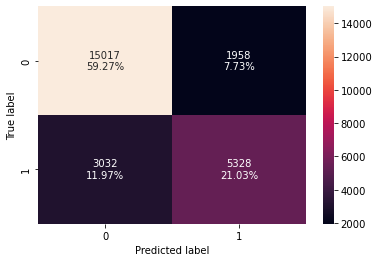

In [77]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [78]:
X_test_tree=X_test.drop(cols_dropped,axis=1) #drop columns for test data

In [79]:
# checking model performance for this model
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test_tree, y_test
)

print("Training performance:")
display(log_reg_model_train_perf)
print("Test performance:")
display(log_reg_model_test_perf)

Training performance:


Accuracy    Recall  Precision        F1
0  0.803039  0.637321   0.731265  0.681069

Test performance:


Accuracy    Recall  Precision        F1
0  0.808897  0.641863   0.735198  0.685368

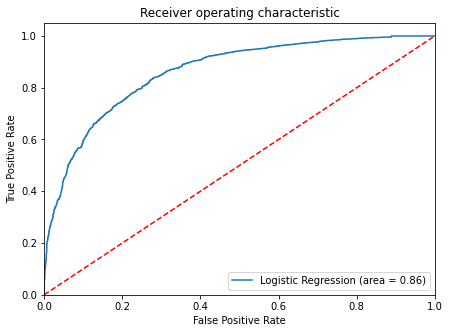

In [80]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [81]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.26782019403194046


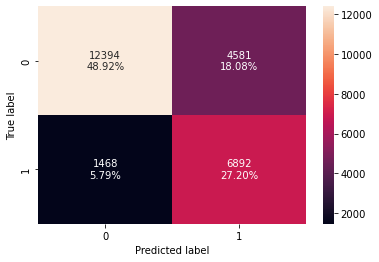

In [82]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [83]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test_tree, y_test, threshold=optimal_threshold_auc_roc
)

print("Training performance:")
display(log_reg_model_train_perf_threshold_auc_roc)
print("Test performance:")
display(log_reg_model_test_perf_threshold_auc_roc)

Training performance:


Accuracy    Recall  Precision        F1
0  0.761239  0.824402   0.600715  0.695003

Test performance:


Accuracy    Recall  Precision        F1
0  0.759532  0.823914   0.593009  0.689647

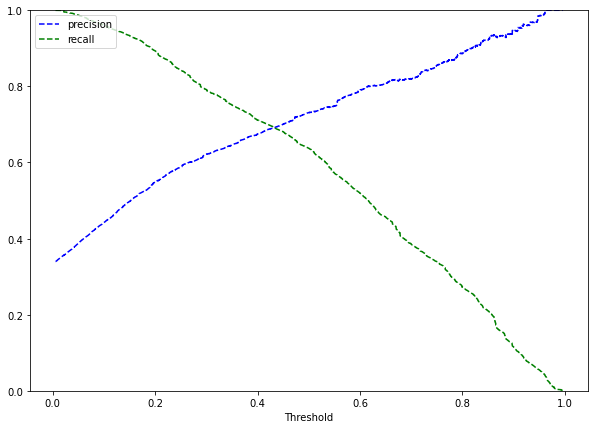

In [84]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [85]:
# setting the threshold
optimal_threshold_curve = 0.42

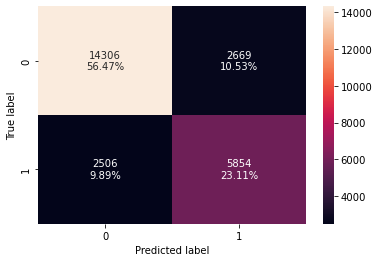

In [86]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [87]:
# checking model performance for this model
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test_tree, y_test, threshold=optimal_threshold_curve
)
print("Training performance:")
display(log_reg_model_train_perf_threshold_curve)
print("Test performance:")
display(log_reg_model_test_perf_threshold_curve)

Training performance:


Accuracy    Recall  Precision        F1
0  0.795737  0.700239   0.686847  0.693479

Test performance:


Accuracy    Recall  Precision        F1
0  0.796832  0.706333   0.679694  0.692758

## Model performance evaluation

In [88]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.27 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
display(models_train_comp_df)

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.27 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
display(models_test_comp_df)

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.803039   
Recall                                        0.637321   
Precision                                     0.731265   
F1                                            0.681069   

           Logistic Regression-0.27 Threshold  \
Accuracy                             0.761239   
Recall                               0.824402   
Precision                            0.600715   
F1                                   0.695003   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.795737  
Recall                               0.700239  
Precision                            0.686847  
F1                                   0.693479

Test performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.808897   
Recall                                        0.641863   
Precision                                     0.735198   
F1                                            0.685368   

           Logistic Regression-0.27 Threshold  \
Accuracy                             0.759532   
Recall                               0.823914   
Precision                            0.593009   
F1                                   0.689647   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.796832  
Recall                               0.706333  
Precision                            0.679694  
F1                                   0.692758

All the models have very similar test and training data. However the scores on the default model are a bit lower.
The highest F1 score is in the in the .42 model with 69.3% on the test and training set. While the F1 scores are nearly the same on the .27 model, the accuracy is also better in the .42 model, so this is the model we will recommend.

### Build Decision Tree Model

Let's just remind ourselves what we want to achieve:

### Model evaluation criterion

#### Model can make wrong predictions as:
- Predicting a reservation will be canceled but in reality the reservation won't be canceled. (False positive)

- Predicting a reservation won't be canceled but in reality the reservation will be canceled. (False Negative)

#### Which case is more important?
- If we predict a reservation won't be canceled, but will be, the hotel looses (revenue) when they  cannot resell the room. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin. 

- If we predict the reservation will be canceled, but the guests show up, most of the time, the hotel can just assign another room. It might not be able to fulfill all the requirements of the customers. If the hotel is full however and has given away the room under the assumtion that it will be canceled, there will be very unhappy customers that need to find new accomodations. The hotel will have to find and pay for the customers new accomodations, some way most likely monetary of making it up to the customers and they will get bad reviews, which in turn cost money.

Both cases are equally bad. We'll focus on reducing both cases as much as possible, so we'll focus on the F1 score.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
- The model_performance_classification_sklearn function will be used to check the model performance of models.
- The make_confusion_matrix function will be used to plot confusion matrix.

In [89]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's build a model. We will weigh it, since our booking staus isn't divided equally over the overall data.

In [90]:
model = DecisionTreeClassifier(criterion="gini", class_weight={0: 0.32, 1: 0.68}, random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.32, 1: 0.68}, random_state=1)

#### Checking model performance on training set

In [2]:
# checking model performance for this model
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

NameError: name 'model_performance_classification_sklearn' is not defined

In [1]:
test=decision_tree_perf_train.copy()

NameError: name 'decision_tree_perf_train' is not defined

In [ ]:
test.insert(2, 'new-col', data)

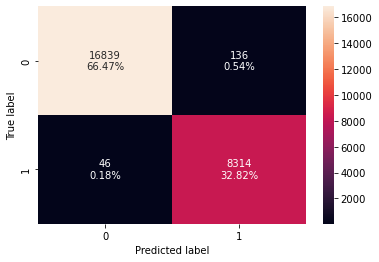

In [92]:
confusion_matrix_sklearn(model, X_train, y_train)

#### Checking model performance on test set

In [93]:
# checking model performance for this model
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.859458  0.796081   0.776239  0.786035

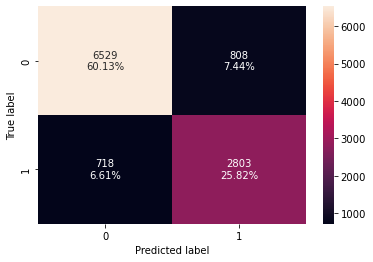

In [94]:
confusion_matrix_sklearn(model, X_test, y_test)

As could be expected since we didn't prune at all, we have great results on the training set, but less so on the test set. Even though a the F1 score of .79 on the test set isn't that bad. We want those values to be closer together.

#### Visualizing the Decision Tree

In [95]:
column_names = list(X.columns)
feature_names = column_names
print("These columns will be used for decicion making:\n",feature_names)

These columns will be used for decicion making:
 ['const', 'no_of_adults', 'no_of_children', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'length_of_stay', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'day_of_week_weekday_only', 'day_of_week_weekend_only', 'season_spring', 'season_summer', 'season_winter']


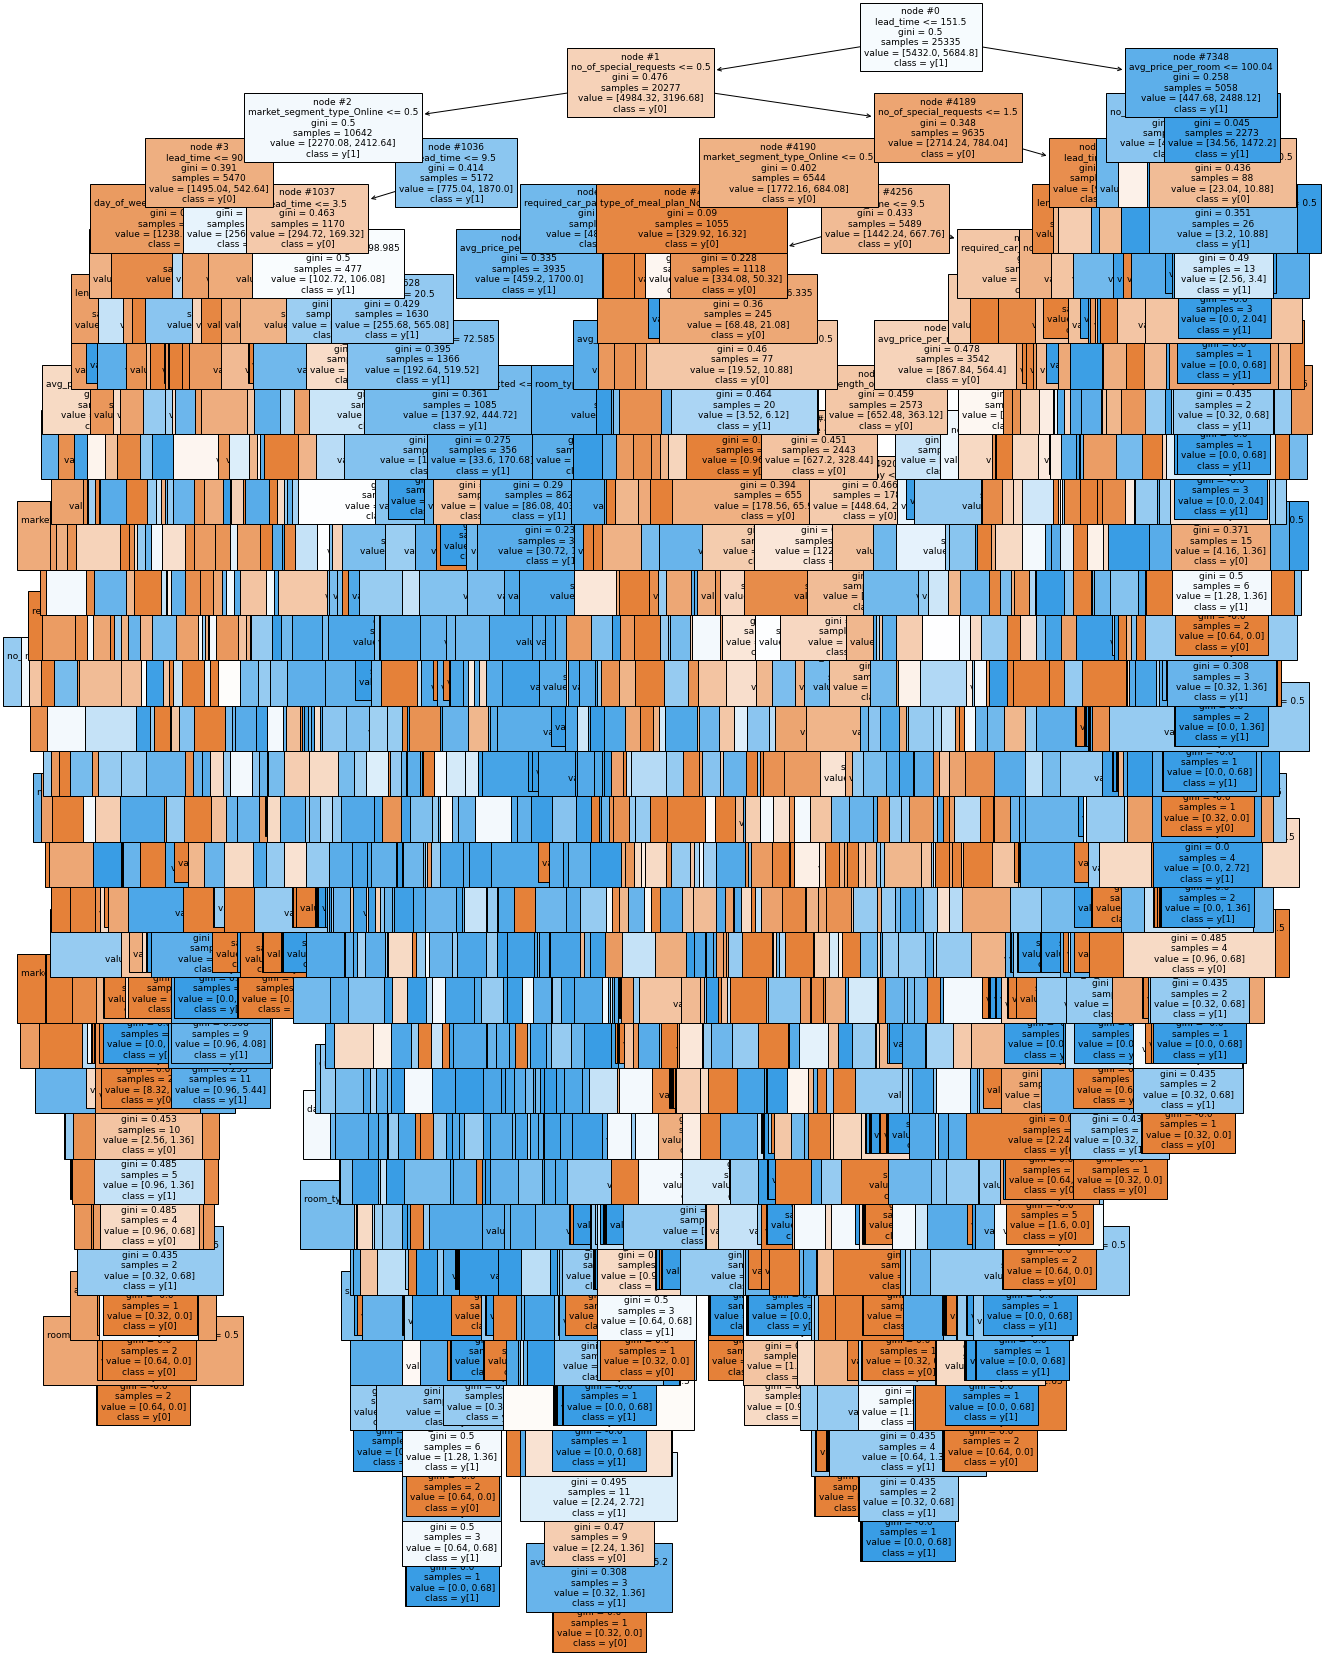

In [96]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [97]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- day_of_week_weekday_only <= 0.50
|   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |--- length_of_stay <= 14.50
|   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 61.00
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 59.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [5.12, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  59.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 23.80] class: 1
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  61.00
|   |   |   |   |   |   |   |   |   |--- length_of_stay <= 7.50
|   |   |   |   |   |   |   |   |   |   |--- length_of_stay <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |  

In [98]:
# Print node count
print("Number of nodes: ",model.tree_.node_count)

Number of nodes:  7917


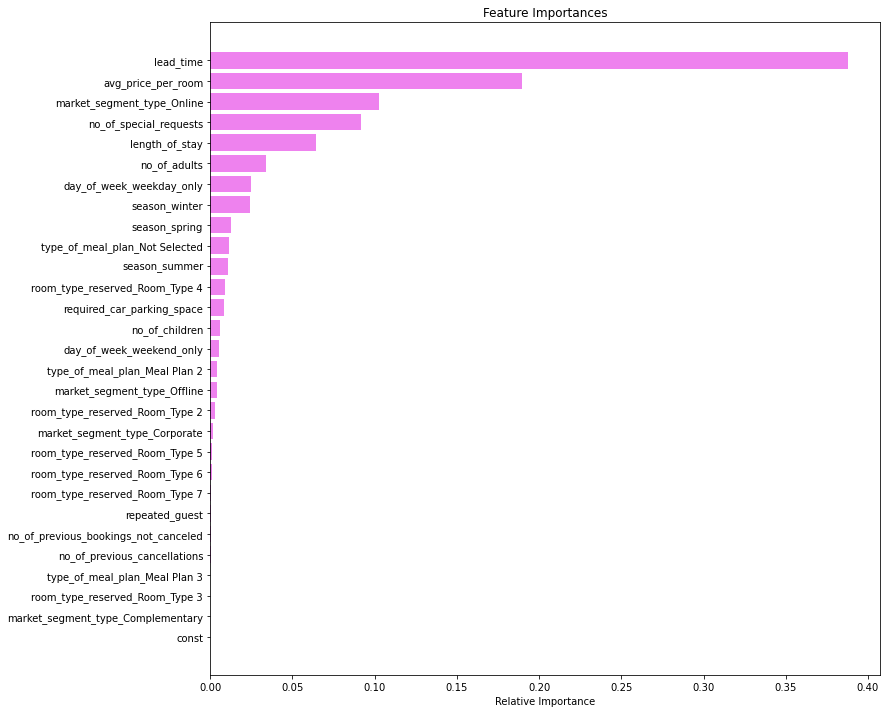

In [99]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Pruning the tree

#### Pre-Pruning (GridSearch for Hyperparameter tuning)

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [100]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(class_weight={0: 0.32, 1: 0.68}, random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001, 0.001],
    "min_samples_split":[None,1,5,8,10,12,15]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.32, 1: 0.68},
                       min_impurity_decrease=0.0001, min_samples_split=10,
                       random_state=1)

In [101]:
# checking model performance for this model
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision       F1
0  0.888376  0.886722   0.797611  0.83981

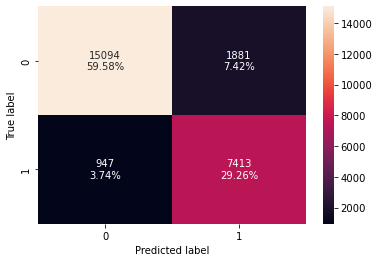

In [102]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [103]:
# checking model performance for this model
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.859366  0.840102   0.754207  0.794841

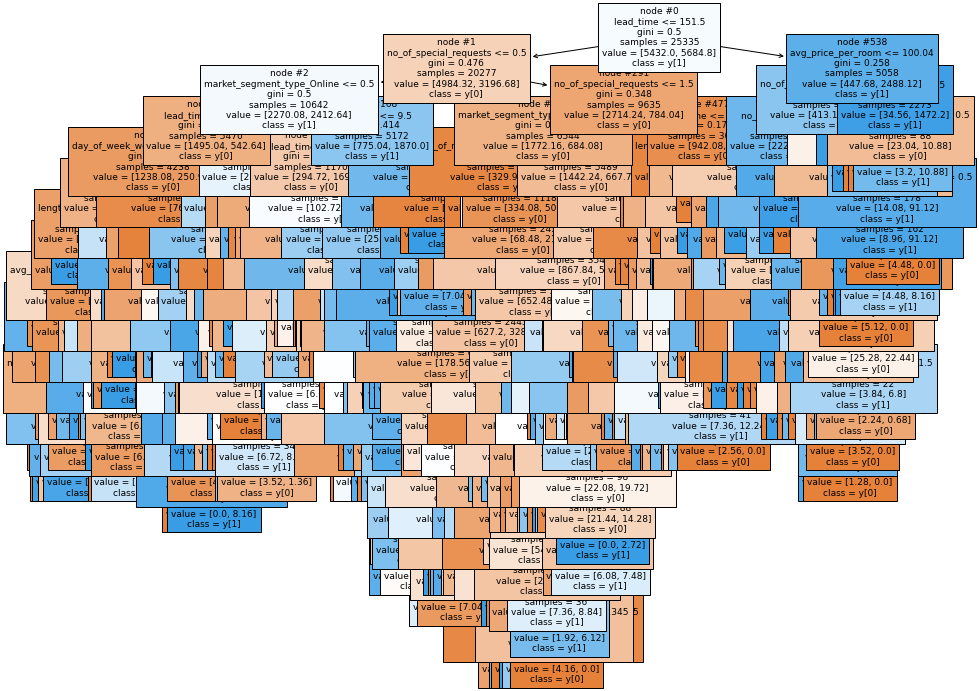

In [104]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [105]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- day_of_week_weekday_only <= 0.50
|   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |--- length_of_stay <= 14.50
|   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 61.00
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 59.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [5.12, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  59.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 23.80] class: 1
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  61.00
|   |   |   |   |   |   |   |   |   |--- weights: [34.56, 4.08] class: 0
|   |   |   |   |   |   |   |--- lead_time >  1.50
|   |   |   |   |   |   |   |   |--- lead_time <= 59.50
|   |   |   |   |   |   |   |   |   |--- length_

In [106]:
# Print node count
print("Number of nodes: ",estimator.tree_.node_count)

Number of nodes:  661


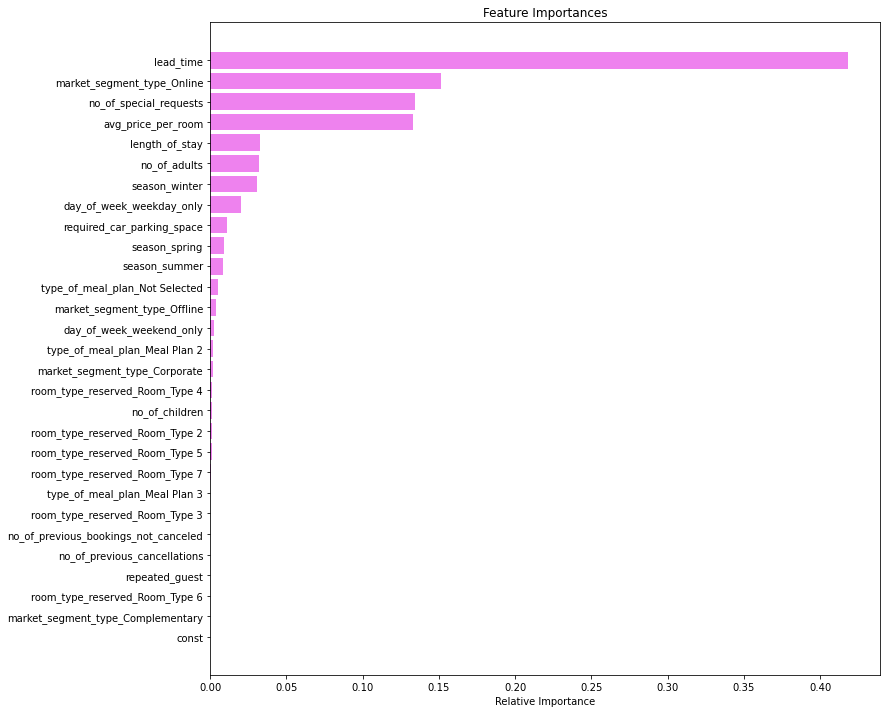

In [107]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Post-pruning (Cost Complexity Pruning)

This pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

In [108]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.32, 1: 0.68})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [109]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.009059
1     0.000000e+00    0.009059
2     0.000000e+00    0.009059
3     9.587418e-21    0.009059
4     9.587418e-21    0.009059
...            ...         ...
2041  9.347026e-03    0.326545
2042  9.513156e-03    0.336058
2043  1.184927e-02    0.347907
2044  3.537002e-02    0.418647
2045  8.109426e-02    0.499741

[2046 rows x 2 columns]

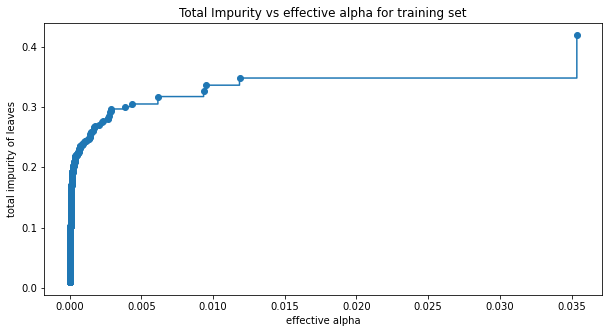

In [110]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [111]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08109426173566053


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

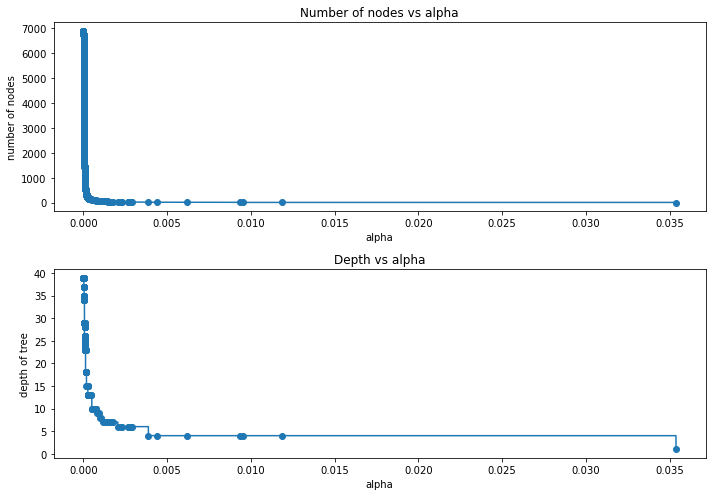

In [112]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [113]:
# f1 training data
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [114]:
#f1 score test data
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

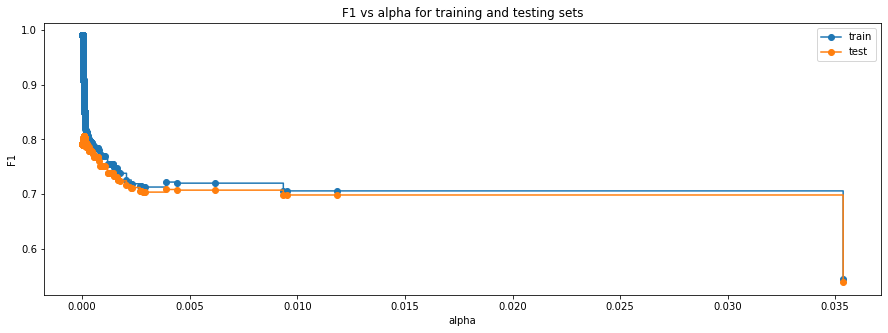

In [115]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [116]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=9.443405464105894e-05, random_state=1)


#### Checking model performance on training set

In [117]:
# checking model performance for this model
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0  0.908861  0.825837   0.890035  0.856735

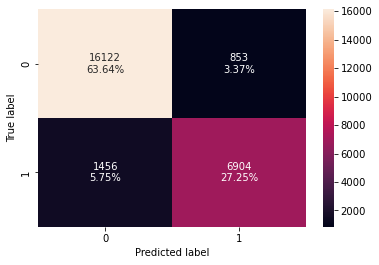

In [118]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#### Checking model performance on test set

In [119]:
# checking model performance for this model
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0  0.878615  0.778756   0.835721  0.806233

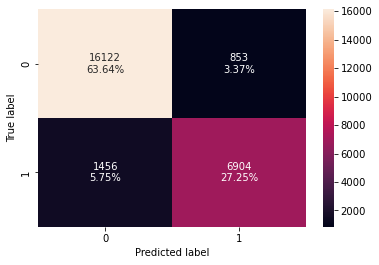

In [120]:
confusion_matrix_sklearn(best_model, X_train, y_train)

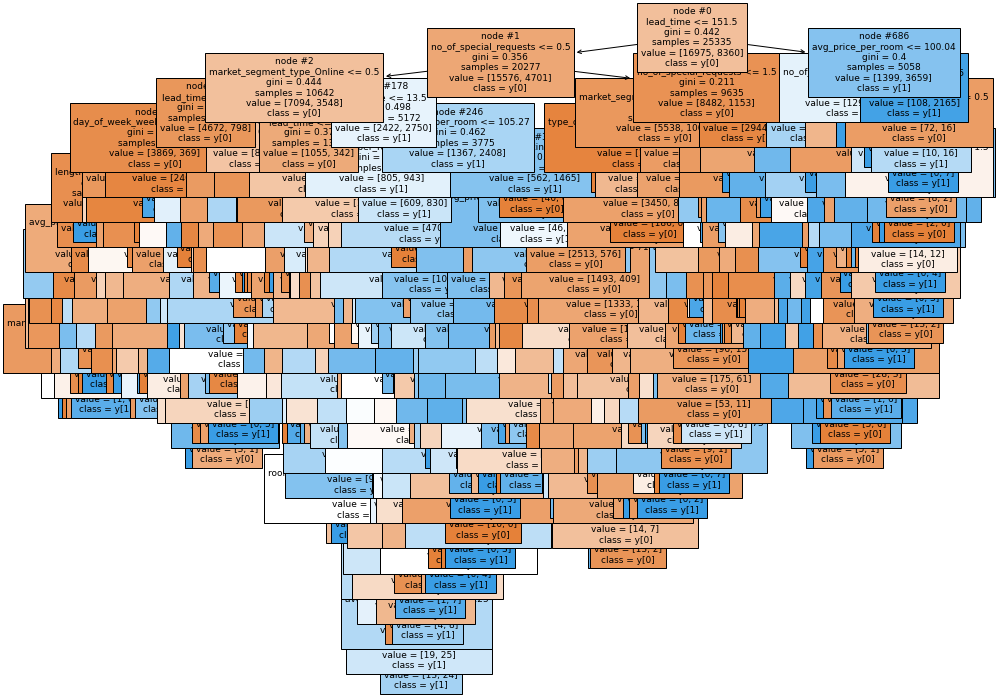

In [121]:
plt.figure(figsize=(15, 12))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [122]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- day_of_week_weekday_only <= 0.50
|   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |--- length_of_stay <= 14.50
|   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 61.00
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 59.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  59.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 35.00] class: 1
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  61.00
|   |   |   |   |   |   |   |   |   |--- weights: [108.00, 6.00] class: 0
|   |   |   |   |   |   |   |--- lead_time >  1.50
|   |   |   |   |   |   |   |   |--- lead_time <= 59.50
|   |   |   |   |   |   |   |   |   |--- lengt

In [123]:
# Print node count
print(best_model.tree_.node_count)

841


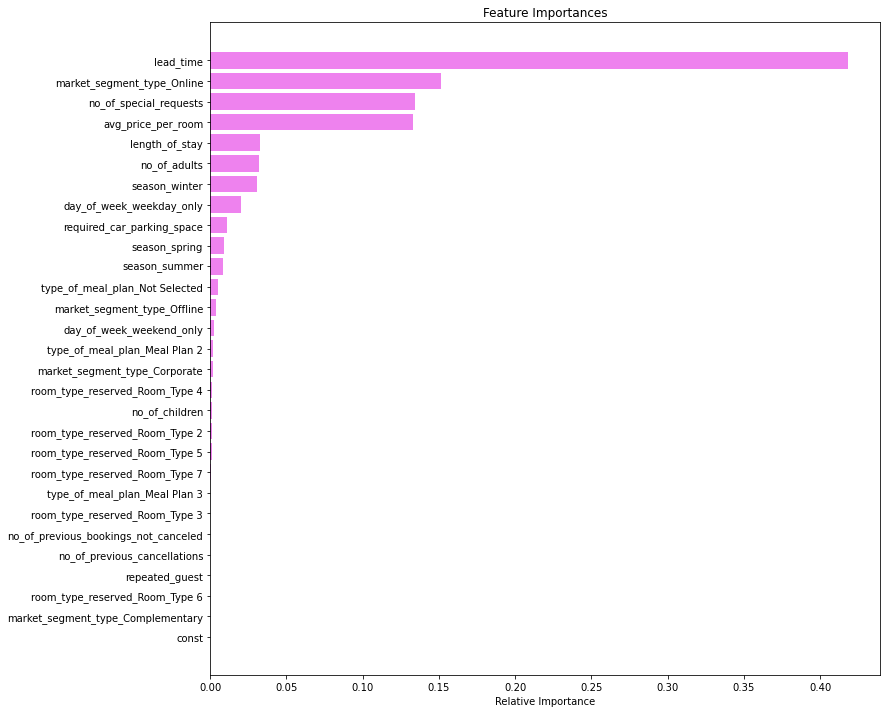

In [124]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Performance Comparison and Conclusions

In all 3 trees, lead time is the major factor in the deciscion making. While in the perfect tree the feature importance is ranked Lead Time, average price, online booking, number of requests, number of adults, both pruned trees are ranked as follows:
1. Lead time
2. Online booking
3. Number of requests
4. Average price
5. Length of stay

Let's look at the metrics:

In [125]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]

print('\033[1m' + "\nTraining performance comparison:"+ '\033[0m')
display(models_train_comp_df)
print('\033[1m' + "\nTest set performance comparison:"+ '\033[0m')
display(models_test_comp_df)     
       


Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.992816                     0.888376   
Recall                  0.994498                     0.886722   
Precision               0.983905                     0.797611   
F1                      0.989173                     0.839810   

           Decision Tree (Post-Pruning)  
Accuracy                       0.908861  
Recall                         0.825837  
Precision                      0.890035  
F1                             0.856735


Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.859458                     0.859366   
Recall                  0.796081                     0.840102   
Precision               0.776239                     0.754207   
F1                      0.786035                     0.794841   

           Decision Tree (Post-Pruning)  
Accuracy                       0.878615  
Recall                         0.778756  
Precision                      0.835721  
F1                             0.806233

The tree with post pruning has a slightly better F1 score on the test data than the pre-pruned tree, but is better on the training data and accuracy on the test data is a bit better as well. 
Unless complexity is an issue, I would go with the post-pruned tree which has 841 nodes. That is a lot less complicated than the over 7000 nodes in the unpruned tree, but still more than the 661 nodes in the pre-pruned tree.

## Actionable Insights and Recommendations

This decicion tree will help the hotels to overbook in a controlled way, since it helps predicting cancellations. 

In order to reduce cancelation alltogether, there are a few things that might be improved. 

Increase the rate of repeat guests:
- If it doesn't already exists, put in place a system that rewards returning guests with lower prices, complementary stays.
- There are not many repeat guests, and most of those aren't families. One way to go is to become more family friendly and become a brand loved by families. The increased cancelations of families would be outweighed by the low repeat guests rates.
- Another way is to cater more to business people and couples in a brand specific way.
How to do that will have to be figured out by the marketing department.

Since lead time is a factor in cancelations, remind customers in regular intervals ahead of time about the stay, that way the cancelations might occur earlier. 

The more special requirements are made, the less likely cancelations are occurring, so be sure to always mention online and offline that those can be requested.

Actual overbooking will occur at some point, and there needs to be a good compensation system in place if that occurs.

#### Things to follow up on:
As I have mentioned before and as can be seen in the Appendix, the Arrival Day itself is off. There are many reasons what could have happened, so this needs to be checked with the provider of the data. For this analysis we trusted the data for the months is in order.
But due to this, we couldn't look at a time line and see if there are special holidays etc. where the hotels fill up. 

Another interesting tidbit to analyze would be how far in advance reservations are canceled and the reviews the hotels are given.

The fact that we only have partial data for 2017 and only one full year in 2018, makes the data less reliable. As mentioned above we made a concious decision to leave it as is. But there should be a reevaluation once more data is available.

### Appendix

- March 29 is the Thursday before Easter, so at least 2 days in the following 5 days have to be a weekend, same for the week before.

In [126]:
booking[(booking['arrival_year']==2018)&(booking['arrival_month']==3)&(booking['arrival_date']==29)]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
79      INN00080             2               0                     0   
134     INN00135             1               0                     0   
350     INN00351             2               0                     0   
1027    INN01028             2               0                     0   
1874    INN01875             1               0                     0   
1909    INN01910             1               0                     0   
2969    INN02970             3               0                     0   
4245    INN04246             2               0                     0   
4280    INN04281             2               0                     0   
4690    INN04691             2               0                     0   
5337    INN05338             2               1                     0   
5995    INN05996             1               0                     0   
6818    INN06819             2               0                     0   
7028    INN07029             2               0                     0   
8338    INN08339             2               0                     0   
8465    INN08466             3               0                     0   
8481    INN08482             2               0                     0   
9165    INN09166             3               0                     0   
9186    INN09187             2               0                     0   
9214    INN09215             2               0                     0   
9675    INN09676             1               0                     0   
9773    INN09774             2               0                     0   
10555   INN10556             2               0                     0   
13982   INN13983             2               0                     0   
14324   INN14325             1               0                     0   
14448   INN14449             2               0                     0   
16493   INN16494             2               0                     0   
16967   INN16968             2               0                     0   
17573   INN17574             2               0                     0   
18209   INN18210             2               0                     0   
18299   INN18300             2               0                     0   
19552   INN19553             2               1                     0   
20014   INN20015             2               0                     0   
20080   INN20081             1               0                     0   
20760   INN20761             2               0                     0   
21535   INN21536             1               0                     0   
22045   INN22046             2               0                     0   
22163   INN22164             2               0                     0   
22165   INN22166             2               0                     0   
22641   INN22642             2               0                     0   
23220   INN23221             3               0                     0   
23271   INN23272             2               0                     0   
23346   INN23347             2               0                     0   
24355   INN24356             2               0                     0   
24861   INN24862             2               0                     2   
25018   INN25019             2               0                     0   
25143   INN25144             1               0                     0   
25651   INN25652             2               0                     2   
25948   INN25949             1               0                     0   
26767   INN26768             2               0                     2   
27023   INN27024             1               0                     0   
27455   INN27456             2               0                     0   
27740   INN27741             3               0                     0   
28264   INN28265             3               0                     0   
28547   INN28548             1               0

In [127]:
booking[(booking['arrival_year']==2018)&(booking['arrival_month']==3)&(booking['arrival_date']==22)]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
175     INN00176             2               0                     0   
1716    INN01717             2               0                     0   
2220    INN02221             1               0                     0   
3491    INN03492             2               0                     0   
3542    INN03543             3               0                     0   
4705    INN04706             2               0                     0   
5153    INN05154             2               0                     0   
5494    INN05495             1               0                     0   
6240    INN06241             2               0                     0   
6531    INN06532             2               0                     0   
6879    INN06880             2               0                     0   
7402    INN07403             2               0                     0   
7580    INN07581             1               0                     0   
8138    INN08139             2               0                     0   
9584    INN09585             2               0                     0   
9872    INN09873             2               0                     0   
10849   INN10850             1               0                     0   
11399   INN11400             2               1                     0   
11742   INN11743             2               0                     0   
13038   INN13039             2               1                     0   
13655   INN13656             2               0                     0   
14748   INN14749             2               0                     0   
16489   INN16490             2               0                     0   
16689   INN16690             3               0                     0   
16973   INN16974             3               0                     0   
17501   INN17502             2               0                     0   
18755   INN18756             2               1                     0   
18817   INN18818             2               0                     0   
19142   INN19143             2               0                     0   
19233   INN19234             3               0                     0   
19395   INN19396             2               0                     0   
19566   INN19567             2               0                     0   
19620   INN19621             3               0                     0   
19841   INN19842             2               2                     2   
20107   INN20108             2               0                     0   
20550   INN20551             2               0                     2   
20783   INN20784             1               0                     0   
21693   INN21694             3               0                     0   
22398   INN22399             2               0                     0   
22573   INN22574             3               0                     0   
23773   INN23774             2               0                     0   
23805   INN23806             2               0                     0   
27101   INN27102             2               0                     0   
27296   INN27297             2               0                     0   
27481   INN27482             2               0                     0   
29404   INN29405             3               0                     0   
29469   INN29470             2               0                     0   
30020   INN30021             2               0                     0   
31485   INN31486             2               2                     0   
32126   INN32127             2               2                     0   
32425   INN32426             2               1                     0   
32485   INN32486             2               0                     2   
32736   INN32737             1               0                     0   
33067   INN33068             2               0                     0   
33848   INN33849             2               0

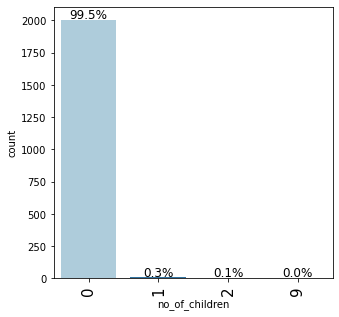

count      mean       std  min  25%  50%  75%  max  \
no_of_children  2017.0  0.009916  0.217992  0.0  0.0  0.0  0.0  9.0   

                missing values    %0   %1   %2   %9  
no_of_children               0  99.5  0.3  0.1  0.0

In [128]:
check_out_object(booking[booking['market_segment_type']=='Corporate'],'no_of_children')